<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=6>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center> Hackathon Competition </center></h1>
<h1><center> 18 February 2024 </center></h1>

<center><img src="img.jpg" width="480" height="200"></center>

<b><h2><center>NBFC Loan Default Prediction</center></h2></b>

### Business Context

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted. 


### Objective
The objective of this exercise is to understand which parameters play an important role in determining whether a client will default on the loan payment or not.

The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.



### Data Description

- **ID:** unique ID assigned to each applicant
- **loan_amnt:** loan amount (USD) applied each applicant
- **loan_term:** Loan duration in years
- **interest_rate:** Applicable interest rate on Loan in %
- **loan_grade:** Loan Grade Assigned by the bank
- **loan_subgrade:** Loan SubGrade Assigned by the bank
- **job_experience:** Number of years job experience 
- **home_ownership:** Status of House Ownership
- **annual_income:** Annual income of the applicant
- **income_verification_status:** Status of Income verification by the bank
- **loan_purpose:** Purpose of loan
- **state_code:** State code of the applicant's residence 
- **debt_to_income:** Ratio to total debt to income (total debt might include other loan aswell)
- **delinq_2yrs:** number of 30+ days delinquency in past 2 years
- **public_records:** number of legal cases against the applicant
- **revolving_balance:** total credit revolving balance
- **total_acc:** total number of credit lines available in members credit line
- **interest_receive:** total interest received by the bank on the loan
- **application_type:** Whether the applicant has applied the loan by creating individuall or joint account
- **last_week_pay:** How many months have the applicant paid the loan EMI already
- **total_current_balance:** total current balance of all the accounts of applicant
- **total_revolving_limit:** total revolving credit limit
- **default:** status of loan amount, 1 = Defaulter, 0 = Non Defaulters

## Importing necessary libraries

In [393]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading the Dataset

In [394]:
# loading the dataset
loandefaulters = pd.read_csv("Train_set.csv")

<IPython.core.display.Javascript object>

## Data Overview

### Checking the shape of the dataset

In [395]:
# Check the number opf rows and columns in the dataset
print(
    "The dataset has {} rows and {} columns".format(
        loandefaulters.shape[0], loandefaulters.shape[1]
    )
)

The dataset has 93174 rows and 23 columns


<IPython.core.display.Javascript object>

### Create a copy of the training data to avoid any changes to original data

In [396]:
# Create a copy of the dataset to prevent interfering with original dataset
data = loandefaulters.copy()

<IPython.core.display.Javascript object>

### Displaying the first and last few rows of the dataset

In [397]:
# Lets view the first 5 rows of the data
data.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.170,B,B2,<5 Years,OWN,85000.000,Not Verified,debt_consolidation,NC,26.680,0.000,0.000,39519,20.000,59.600,INDIVIDUAL,4.000,95493.000,84100.000,0
1,14257956,18000,3 years,13.650,C,C1,<5 Years,OWN,64000.000,Verified,debt_consolidation,SC,31.670,0.000,1.000,9783,24.000,3348.250,INDIVIDUAL,95.000,185433.000,13500.000,0
2,66216451,16000,3 years,7.260,A,A4,<5 Years,MORTGAGE,150000.000,Source Verified,debt_consolidation,TX,19.700,2.000,0.000,13641,27.000,276.690,INDIVIDUAL,13.000,180519.000,19300.000,0
3,46974169,25000,3 years,13.990,C,C4,NaN,MORTGAGE,59800.000,Verified,debt_consolidation,MO,37.390,0.000,0.000,35020,35.000,1106.720,INDIVIDUAL,17.000,183208.000,55400.000,0
4,46725961,17000,3 years,6.390,A,A2,10+ years,MORTGAGE,72000.000,Source Verified,credit_card,TX,8.920,0.000,0.000,23990,26.000,725.290,INDIVIDUAL,39.000,23990.000,81300.000,0


<IPython.core.display.Javascript object>

In [398]:
# Lets view the last 5 rows of the data
data.tail()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
93169,65577252,3200,3 years,7.260,A,A4,<5 Years,RENT,85000.000,Not Verified,debt_consolidation,FL,17.110,0.000,0.000,7924,38.000,55.340,INDIVIDUAL,13.000,64635.000,47600.000,0
93170,836021,3500,3 years,5.420,A,A1,NaN,MORTGAGE,57550.000,Not Verified,other,FL,22.640,0.000,0.000,10174,24.000,299.670,INDIVIDUAL,161.000,NaN,NaN,1
93171,33058720,8000,3 years,13.980,C,C3,10+ years,RENT,148531.500,Source Verified,credit_card,AK,13.040,1.000,0.000,5391,25.000,1150.580,INDIVIDUAL,65.000,94596.000,6500.000,0
93172,4060472,35000,3 years,17.770,D,D1,<5 Years,RENT,100000.000,Verified,debt_consolidation,CA,17.220,0.000,0.000,24609,45.000,5764.580,INDIVIDUAL,56.000,33759.000,34900.000,1
93173,3628127,10000,3 years,15.800,C,C3,<5 Years,RENT,60000.000,Verified,debt_consolidation,NJ,11.830,0.000,0.000,11285,7.000,2279.360,INDIVIDUAL,104.000,25594.000,12300.000,0


<IPython.core.display.Javascript object>

### Checking column datatypes and presence of null values

In [399]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

<IPython.core.display.Javascript object>

- The dataset has 23 columns, 9 of string type while the remaining 14 are numeric
- Some columns containing missing value entries, these include job experience, annual income, delinq_2yrs, public_records, total_acc, last_week_pay, total_current_balance, and total_revolving_limit.

### Checking number of non-null values

In [400]:
data.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

<IPython.core.display.Javascript object>

- We will explore ways to treat the missing values if they are random or leave them as NaN if they are by not random.

### Explore the uniqueness of variables in the columns of the dataset

In [401]:
data.nunique()

ID                            93174
loan_amnt                      1310
loan_term                         2
interest_rate                   481
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  8667
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3996
delinq_2yrs                      22
public_records                   15
revolving_balance             35945
total_acc                       102
interest_receive              69122
application_type                  2
last_week_pay                    90
total_current_balance         72306
total_revolving_limit          4469
default                           2
dtype: int64

<IPython.core.display.Javascript object>

- All the rows in the ID column are unique, this may not be informative and we will drop the column at preprocessing
- A number of columns are categorical as shown by few unique entries. These includ loan term, loan grade, loan subgrade, job experience, home ownership, income verification status,loan purpose, state, code, application type and default status
- Other rows appear to be continous variables such as loan amount, interest rate, annual income, debt to income ratio, revolving balance, interest receive and total current balance.
- Some other rows are discrete such as public records, total accounts and last week pay.

### Checking for data duplication in the rows

In [402]:
# checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- The data has no duplicated data set in the rows

### Mathematical dimensions of the Data 

In [403]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.000,35050211.389,24149262.074,70735.000,10859832.500,37107507.000,58598949.500,73519746.000
loan_amnt,93174.000,14733.861,8428.185,500.000,8000.000,13000.000,20000.000,35000.000
interest_rate,93174.000,13.233,4.369,5.320,9.990,12.990,16.200,28.990
annual_income,93173.000,75028.259,69454.784,1200.000,45000.000,64000.000,90000.000,9500000.000
debt_to_income,93174.000,18.128,8.563,0.000,11.930,17.640,23.890,672.520
delinq_2yrs,93172.000,0.317,0.881,0.000,0.000,0.000,0.000,22.000
public_records,93172.000,0.196,0.581,0.000,0.000,0.000,0.000,49.000
revolving_balance,93174.000,16854.469,23689.074,0.000,6433.000,11856.000,20745.000,2560703.000
total_acc,93172.000,25.249,11.855,1.000,17.000,24.000,32.000,119.000
interest_receive,93174.000,1747.264,2088.236,0.000,439.880,1070.755,2219.613,23172.310


<IPython.core.display.Javascript object>

- Average loan amount is USD 14,733. The highest loan amount is USD 35,000 which appears to be an extreme compared to USD 20,000 at the 75th percentile. 
- Interest rate ranges from 5.3% to 28.9%. The average interest rate is 13.2%
- Annual income ranges from 1200 USD to USD 9,500,000. Both values appear to be extreme outliers as they are way lower and higher than the 25th and 75th percentiles respectively.
- There is an accoutn with 49 public records which is an outlier asthe 75th percentile is 0. The average is 0.19.
- The revolving balance is also right skewed as the maximum value of USD 2,560,703 is way higher than the 75th percentile value of USD 20,745.
- The average number of running credit accounts is 25. The minimum is 12 while the maximum is 119, an outlier.

In [404]:
data.describe(include="object").T

,count,unique,top,freq
loan_term,93174,2,3 years,65211
loan_grade,93174,7,B,26865
loan_subgrade,93174,35,B3,5879
job_experience,88472,3,<5 Years,40610
home_ownership,93174,5,MORTGAGE,46445
income_verification_status,93174,3,Source Verified,34487
loan_purpose,93174,4,debt_consolidation,55241
state_code,93174,50,CA,13744
application_type,93174,2,INDIVIDUAL,93118


<IPython.core.display.Javascript object>

- There are only 2 types of loan terms, and the  most frequent is the 3 year loan term
- We have 7 loan grade types, the most common being type B. Of these, we have sub grades and the most common is sub grade B3.
- There are 3 categories of job experience, with the most common being the one with less than 5 years.
- Most cusotmers own homes through mortgages, about 46K of the +93K customers.
- There are two types of loan application types, and the most frequent is the individual type.
- We have 50 state codes in the data, with most people residing in state code CA.
- There are 4 types of loan purpose listed, with the mose common purpose being loans taken for debt consolidation.

## Exploratory Data Analysis (EDA)

### Define Functions to assist with univariate and bivariate column analysis

In [405]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [406]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [407]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [408]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Univariate Analysis

**Plot a snapshot of the histograms for the variables**

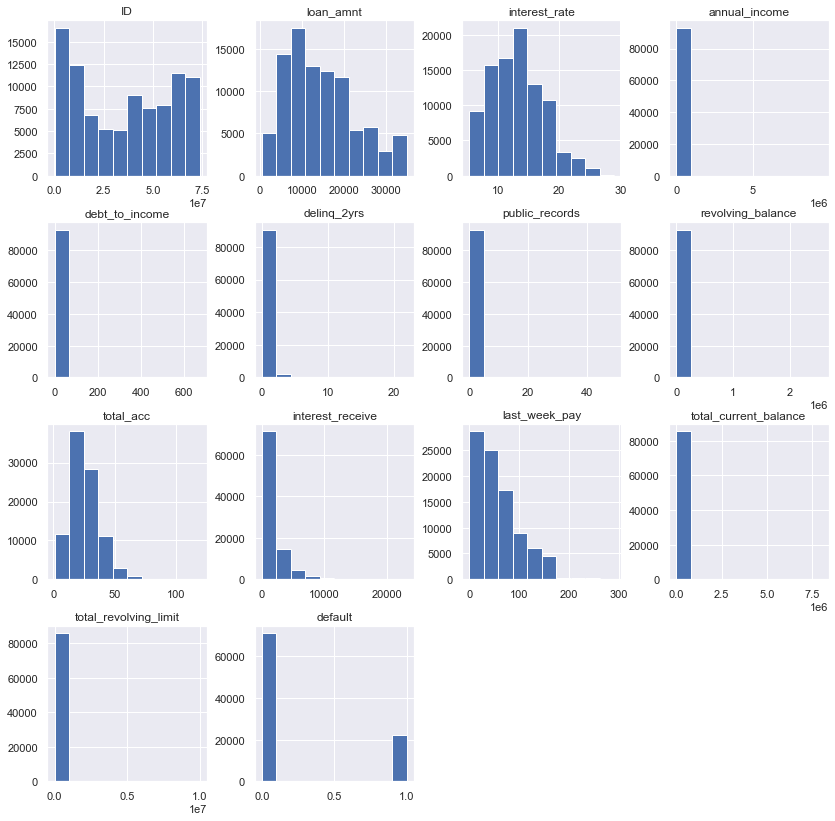

<IPython.core.display.Javascript object>

In [409]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

- There appears to be some relationship between total current balance and total revolving limit which will be investigated further. 
- Interest rate appears to have a normal distribution that is slightly skewed to the right.
- Loan amount has a uniform distribution.

**Observations on Loan Amount**

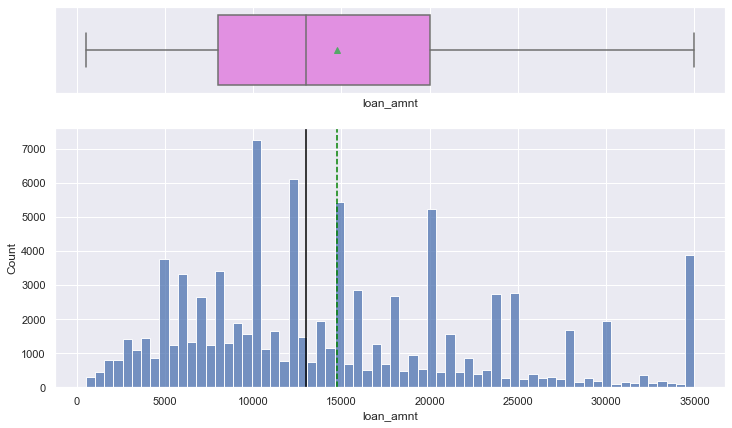

<IPython.core.display.Javascript object>

In [410]:
histogram_boxplot(data, "loan_amnt")

- No observable outliers in the loan amount.
- Average loan amount is around USD 15K
- Multi modal distribution with no clear common amount.

**Observations on Loan Term**

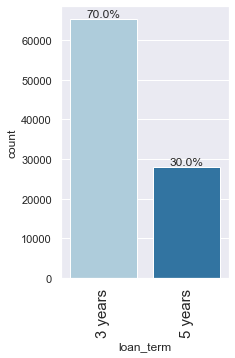

<IPython.core.display.Javascript object>

In [411]:
labeled_barplot(data, "loan_term", perc=True)

- Most of the loans (70%) are 3 Year term loans.
- The remaining loans are 5 Year loan terms.

**Observations on Interest Rate**

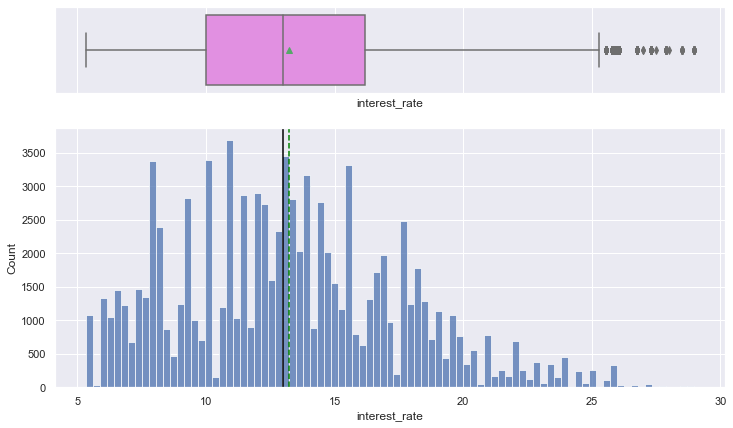

<IPython.core.display.Javascript object>

In [412]:
histogram_boxplot(data, "interest_rate")

- Has outliers on the right side
- Average interest rate is around 13%. 
- The least interest rate is ust about 5%.

**Observations on Loan Grade**

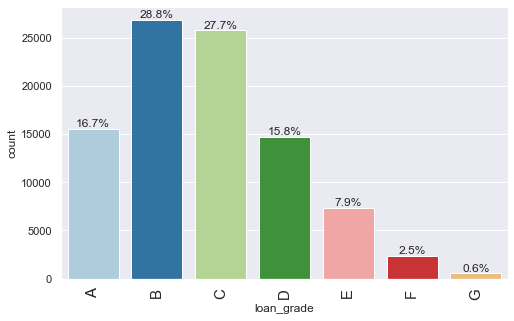

<IPython.core.display.Javascript object>

In [413]:
labeled_barplot(data, "loan_grade", perc=True)

- Loans are graded from A to G, 7 categories. Categorization is not clear and needs to be investigated further from corelation figures.
- Most loans are grade B loans followed by Grade C loans.
- We have very few Grade G loans, which appear to be very premium loans.

**Observations on Loan Sub Grade**

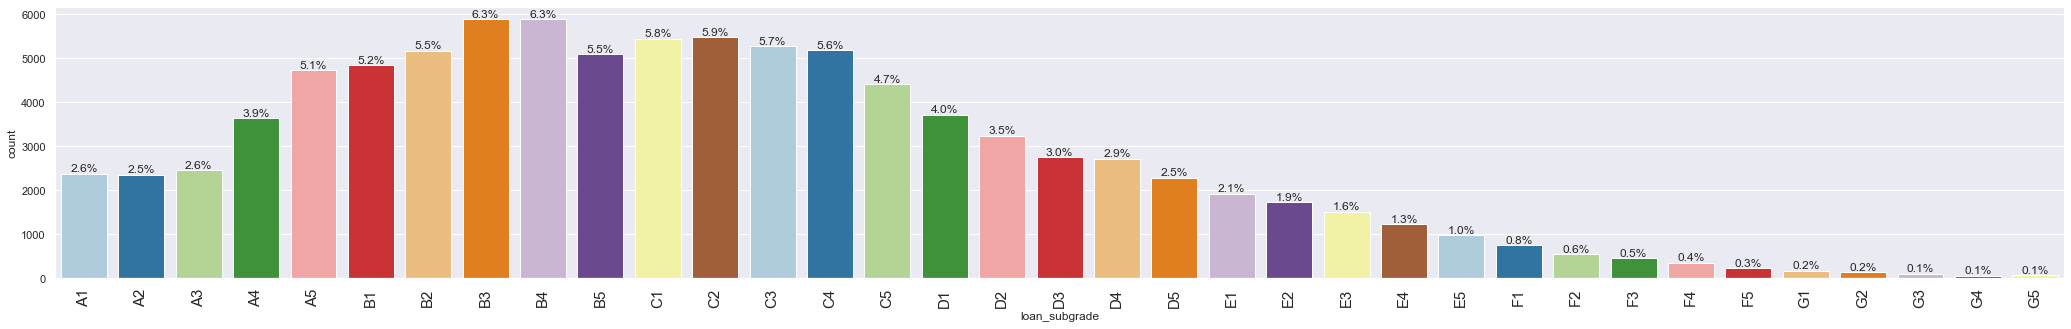

<IPython.core.display.Javascript object>

In [414]:
labeled_barplot(data, "loan_subgrade", perc=True)

- Each loan grade has 5 loan subgrades.
- Most loans are in subgrade B3 and B4.

**Observations on Job Experience**

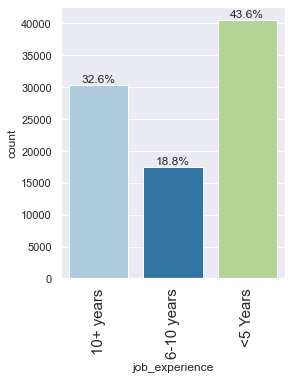

<IPython.core.display.Javascript object>

In [415]:
labeled_barplot(data, "job_experience", perc=True)

- Most loan customers have an experience of less than 5 years at about 43.6%.
- The other categories are those with 6 to 10 years experience and those with over 10 years job experience.

**Observations on Home Ownership**

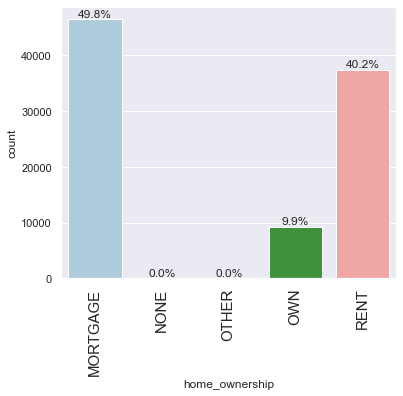

<IPython.core.display.Javascript object>

In [416]:
labeled_barplot(data, "home_ownership", perc=True)

- Almost half of the customers own houses through mortgages.
- 40% of the customers own homes through rent.
- Some entries are labelled as NONE meaning they either dont have homes or they did not disclose.
- 10% of the customers own their own homes.

**Observations on Annual Income**

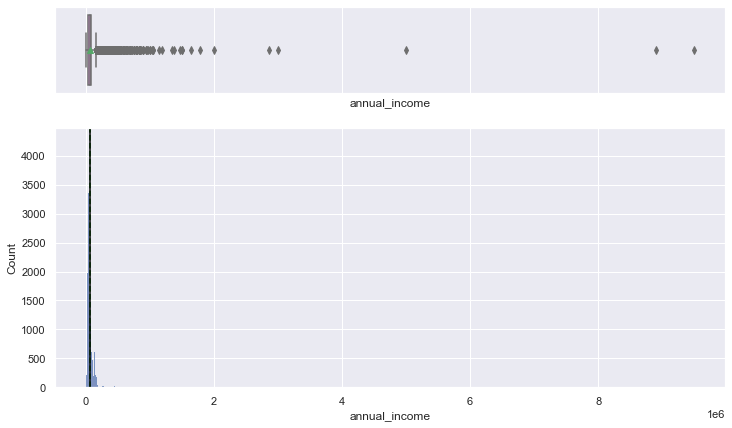

<IPython.core.display.Javascript object>

In [417]:
histogram_boxplot(data, "annual_income")

- Data is heavily skewed to the right.
- May need outlier treatment to reduce the impact of the outliers on the predicitions.

**Observations on Income Verification Status**

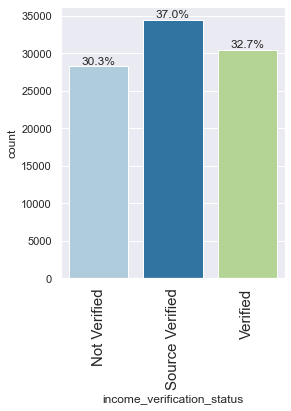

<IPython.core.display.Javascript object>

In [418]:
labeled_barplot(data, "income_verification_status", perc=True)

- Has three categories, Not Verified, Verified and Source verified. We need to investigate if the last two categories are the same and if the difference is a spelling error.
- Customers whose income is not verified are few, only 30% of all the customers. 

**Observations on Loan Purpose**

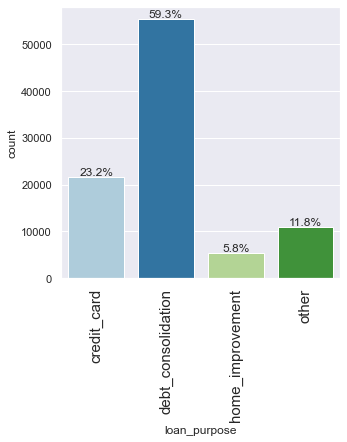

<IPython.core.display.Javascript object>

In [419]:
labeled_barplot(data, "loan_purpose", perc=True)

- Most of the loans ~60% were applied under the debt consolidation category.
- Some other loans were applied under credit cards and for home improvement.
- We also have a small category of loans classified as "other."

**Observations on State Code**

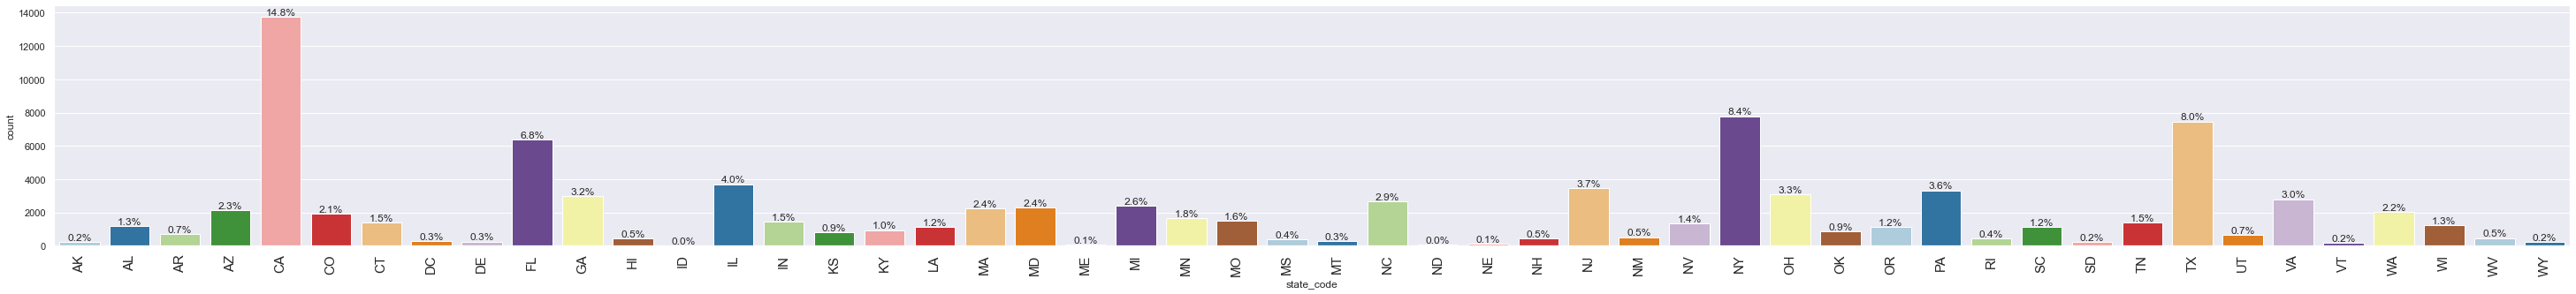

<IPython.core.display.Javascript object>

In [420]:
labeled_barplot(data, "state_code", perc=True)

- Most state codes have customers in them. Some states have huge numbres of applicants such as CA and NY.

**Observations on Debt to Income**

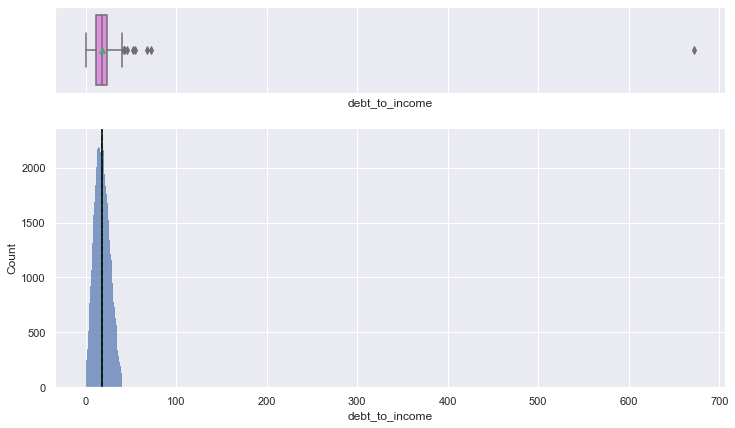

<IPython.core.display.Javascript object>

In [421]:
histogram_boxplot(data, "debt_to_income")

- Data is skewed to the right with some outliers
- Over 85% of the values are 0 so we can also drop this column as it will not add meaningful information to the analysis.
- If we can treat the outliers then we can get a normal distribution.

**Observations on delinq_2yrs**

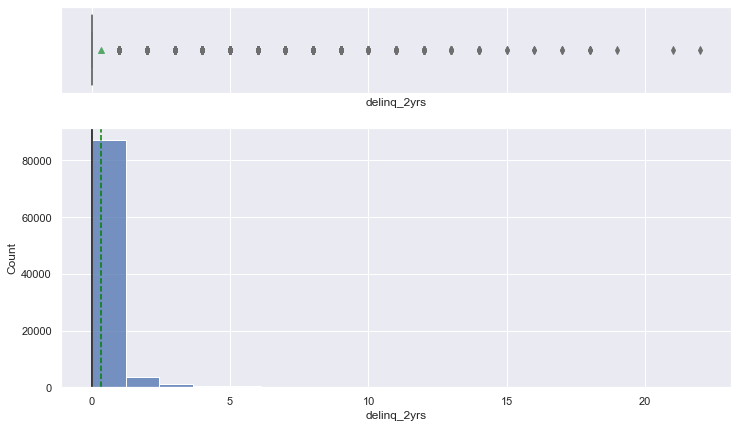

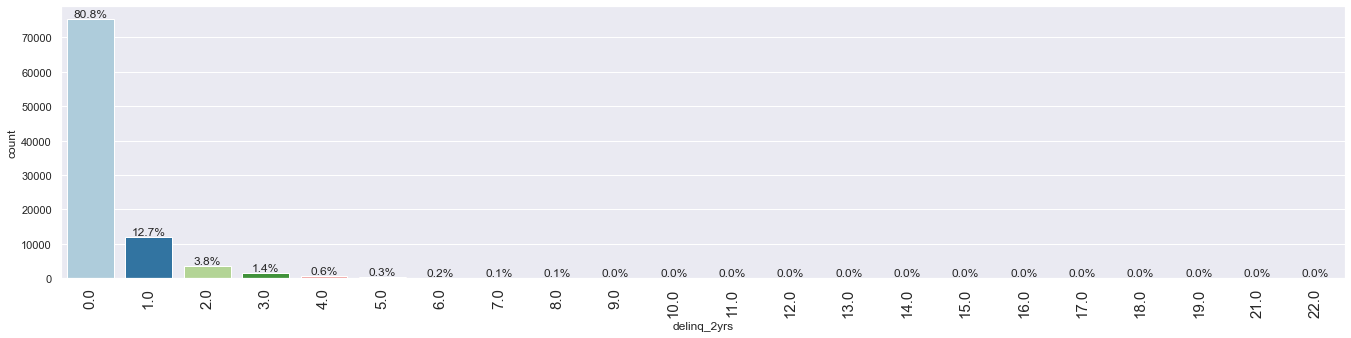

<IPython.core.display.Javascript object>

In [422]:
histogram_boxplot(data, "delinq_2yrs")
labeled_barplot(data, "delinq_2yrs", perc=True)

- Number of 30+ days delinquency in past 2 years. 
- Over 80% of the values are 0 so we can drop this columnas it is unique and may not add meaningful information.
- Data is heavily skewed to the right. Most customers pay their debt in good time.
- Some customers wait upto 22 days to pay their loans past the due date.

**Observations on Public Records**

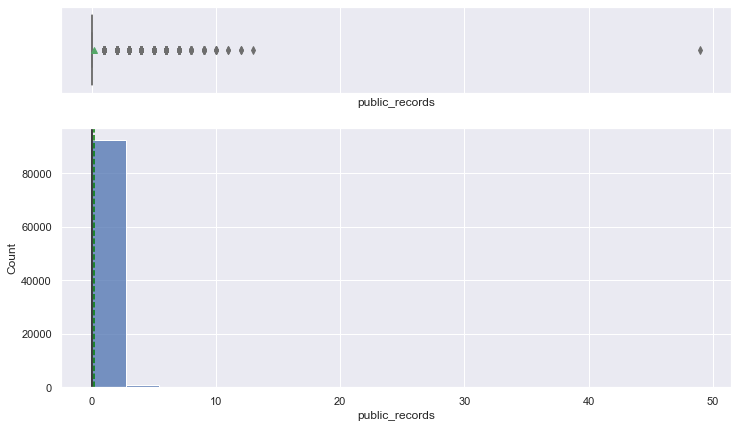

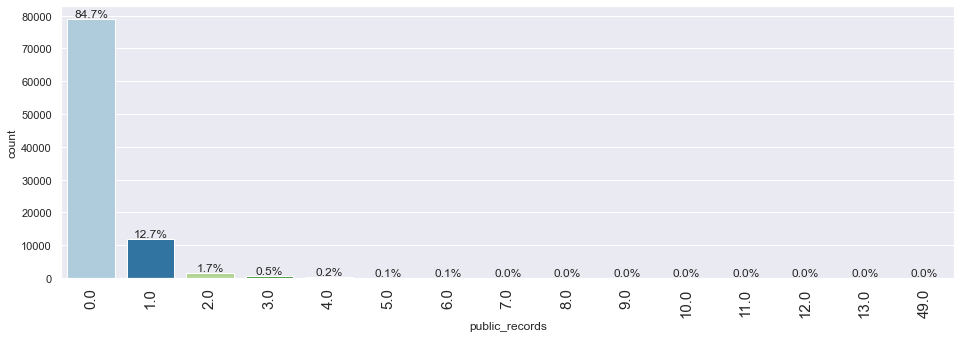

<IPython.core.display.Javascript object>

In [423]:
histogram_boxplot(data, "public_records")
labeled_barplot(data, "public_records", perc=True)

- Number of legal cases against the applicant. Most customers have 0 legal cases against them.
- An outlier of 49 cases for one individual is present and we may need to treat this.

**Observations on Revolving Balance**

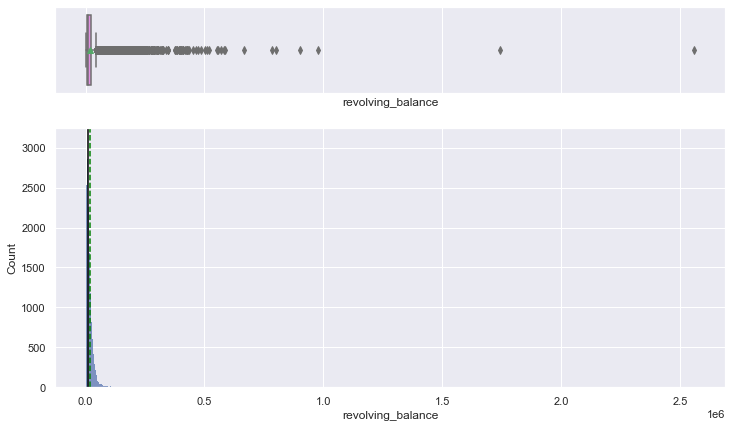

<IPython.core.display.Javascript object>

In [424]:
histogram_boxplot(data, "revolving_balance")

- Total credit revolving balance. Has extreme outliers to the right.
- Data is heavily skewed to the right.

**Observations on Total_acc**

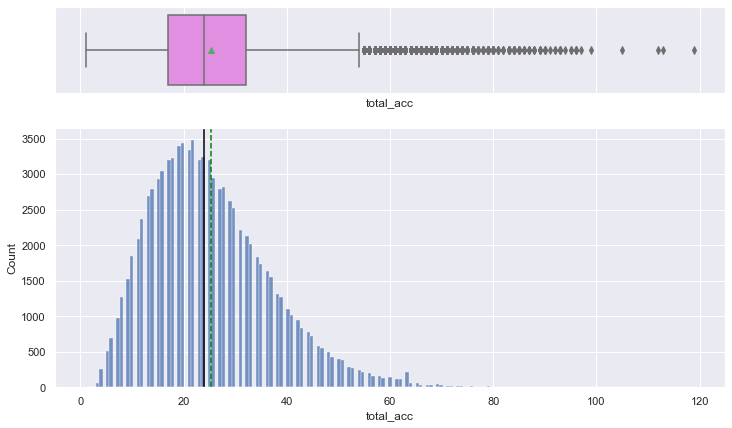

<IPython.core.display.Javascript object>

In [425]:
histogram_boxplot(data, "total_acc")

- Total number of credit lines available in members credit line.
- The mean is close the median at 27.
- Has some outliers, with a maximumof 120 credit lines for one individual.

**Observations on Interest Received**

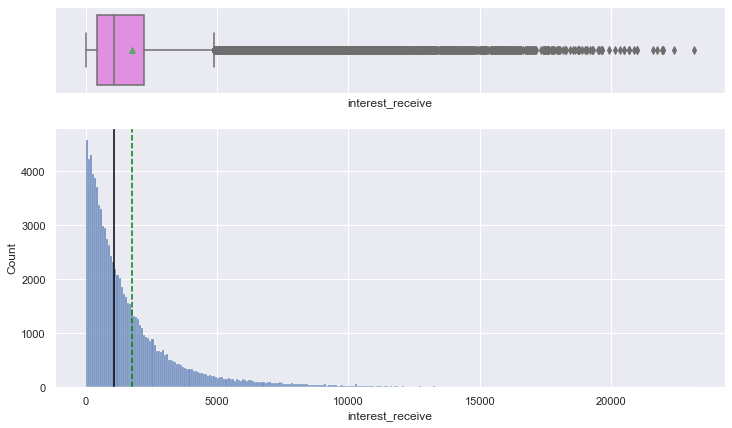

<IPython.core.display.Javascript object>

In [426]:
histogram_boxplot(data, "interest_receive")

- Total interest received by the bank on the loan.
- Data is skewed to the right with many outliers.

**Observations on Application Type**

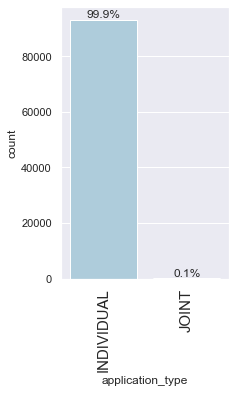

<IPython.core.display.Javascript object>

In [427]:
labeled_barplot(data, "application_type", perc=True)

- Two types of application types for the loan, joint or individual.
- Over 99.9% of the applications were made by individuals.

**Observations on Last Week Pay**

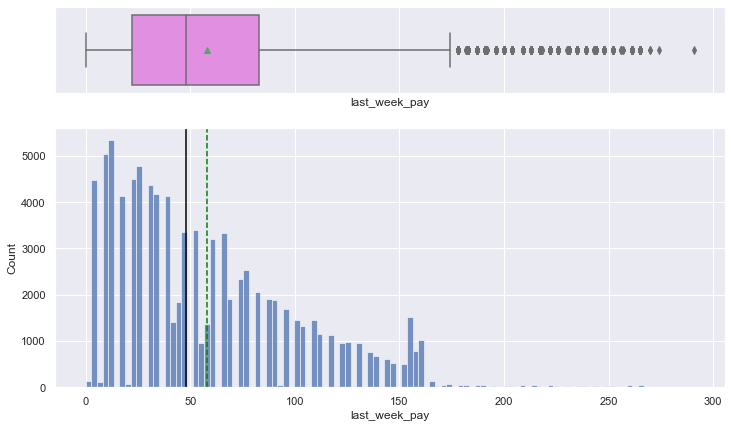

<IPython.core.display.Javascript object>

In [428]:
histogram_boxplot(data, "last_week_pay")

- How many months have the applicant paid the loan Expected Monthly Installments already.
- Median is 49 while average appears to be at 60.
- Some customers have paid the loan for over 300 Months.

**Observations on total_current_balance**

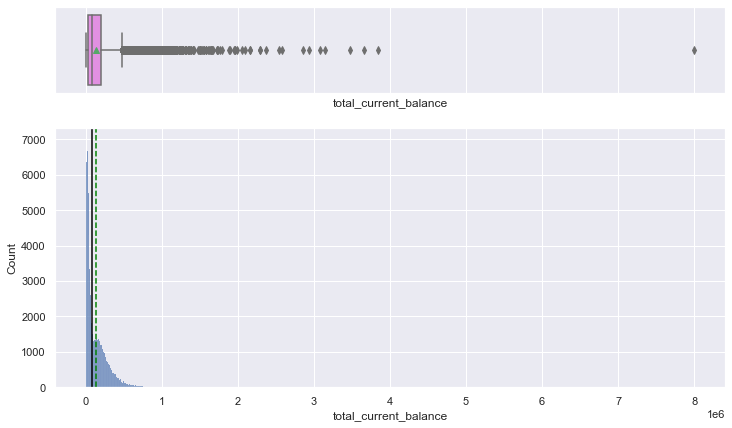

<IPython.core.display.Javascript object>

In [429]:
histogram_boxplot(data, "total_current_balance")

- Data is heavily skewed to the right meaning some customers have huge account balances.
- This doe not appear to be random and we may not treat this for outliers.

**Observations on total_revolving_limit**

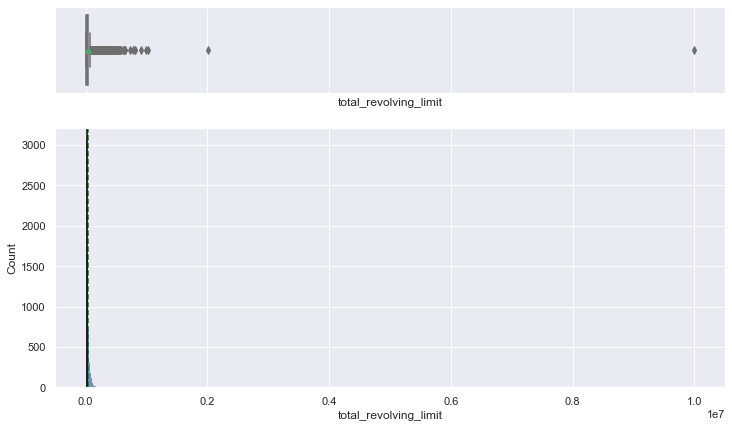

<IPython.core.display.Javascript object>

In [430]:
histogram_boxplot(data, "total_revolving_limit")

- total revolving credit limit.
- Skewed to the right with presence of outliers.

**Observations on Default**

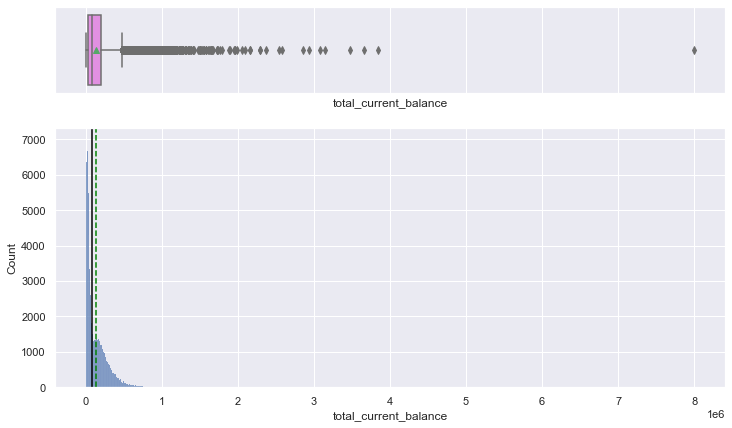

<IPython.core.display.Javascript object>

In [431]:
histogram_boxplot(data, "total_current_balance")

- No of months a customer has been inactive in the last 12 months.
- Has a mode of 3 months but extends to a maximum of 6 months.
- A few customers have never been inactive throughout the months.

## Bivariate Analysis

In [432]:
data.nunique()

ID                            93174
loan_amnt                      1310
loan_term                         2
interest_rate                   481
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  8667
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3996
delinq_2yrs                      22
public_records                   15
revolving_balance             35945
total_acc                       102
interest_receive              69122
application_type                  2
last_week_pay                    90
total_current_balance         72306
total_revolving_limit          4469
default                           2
dtype: int64

<IPython.core.display.Javascript object>

**Loan Term vs Default**

default        0      1    All
loan_term                     
All        71045  22129  93174
3 years    47345  17866  65211
5 years    23700   4263  27963
------------------------------------------------------------------------------------------------------------------------


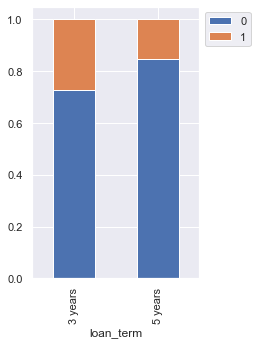

<IPython.core.display.Javascript object>

In [433]:
stacked_barplot(data, "loan_term", "default")

- 3 Year Term loans have a higher chance of deafult than the 5 Year term loans.

**Loan Grade vs Default**

default         0      1    All
loan_grade                     
All         71045  22129  93174
B           19787   7078  26865
C           20203   5584  25787
A           11281   4253  15534
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
------------------------------------------------------------------------------------------------------------------------


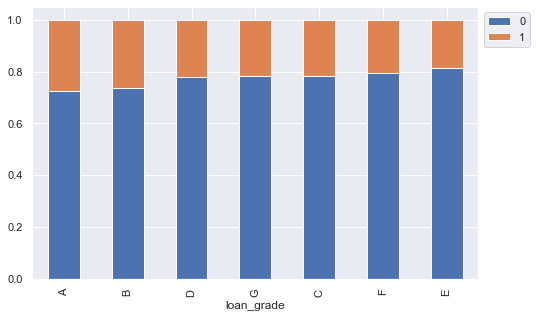

<IPython.core.display.Javascript object>

In [434]:
stacked_barplot(data, "loan_grade", "default")

- Loan Grade A and B have a higher chance of default as compared to higher grade loans E and F.

**Loan Sub Grade vs Default**

default            0      1    All
loan_subgrade                     
All            71045  22129  93174
B3              4196   1683   5879
B4              4335   1544   5879
B2              3750   1419   5169
C1              4152   1291   5443
B5              3837   1258   5095
C2              4264   1215   5479
B1              3669   1174   4843
A5              3558   1165   4723
A4              2502   1129   3631
C3              4150   1120   5270
C4              4161   1021   5182
C5              3476    937   4413
D1              2932    784   3716
D2              2462    777   3239
A3              1731    719   2450
D3              2114    645   2759
A2              1710    643   2353
A1              1780    597   2377
D4              2154    563   2717
D5              1816    468   2284
E1              1598    326   1924
E3              1206    307   1513
E2              1436    300   1736
E4               996    232   1228
E5               767    210    977
F1               590

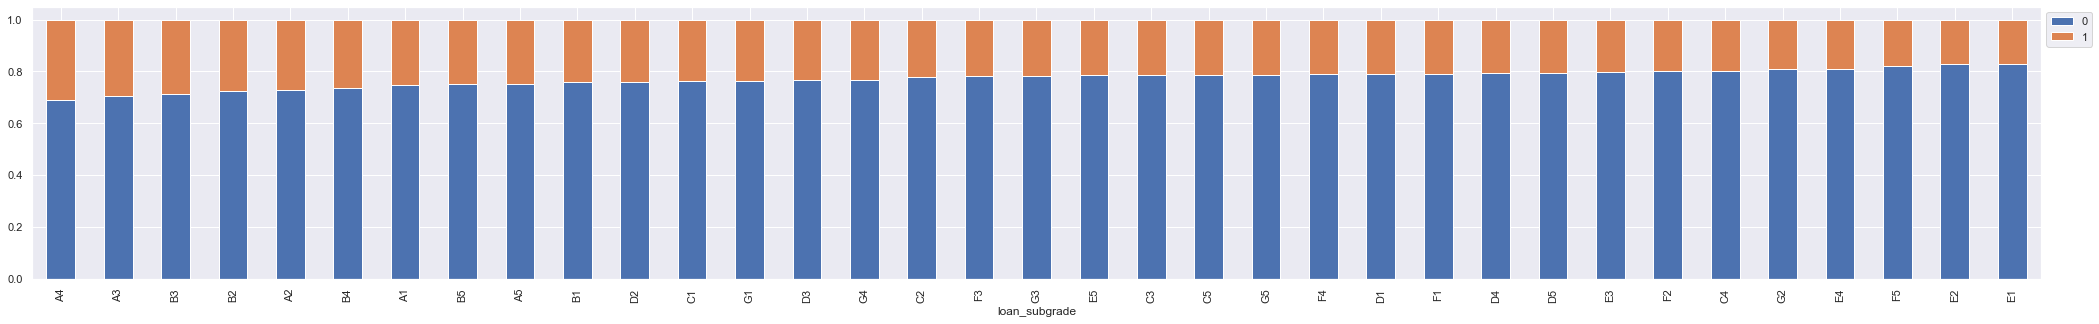

<IPython.core.display.Javascript object>

In [435]:
stacked_barplot(data, "loan_subgrade", "default")

- Loan sub grades in Grade A and B have a higher chance of default as compared to higher sub grade loans E and F.
- Almost a similar pattern to Grade vs Default.

**Job Experience vs Default**

default             0      1    All
job_experience                     
All             67140  21332  88472
<5 Years        30377  10233  40610
10+ years       23656   6706  30362
6-10 years      13107   4393  17500
------------------------------------------------------------------------------------------------------------------------


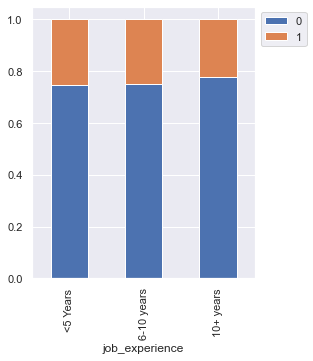

<IPython.core.display.Javascript object>

In [436]:
stacked_barplot(data, "job_experience", "default")

-  The rate of default appear to be similar across all job experience groups.
- 10+ Years appears to be slightly higher at defualt than the lower years of job experience.

**Home Ownership vs Default**

default             0      1    All
home_ownership                     
All             71045  22129  93174
MORTGAGE        35316  11129  46445
RENT            28401   9048  37449
OWN              7323   1931   9254
OTHER               3     15     18
NONE                2      6      8
------------------------------------------------------------------------------------------------------------------------


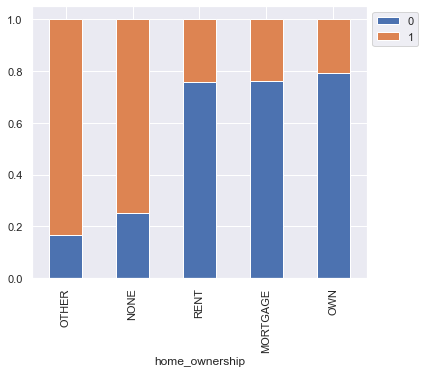

<IPython.core.display.Javascript object>

In [437]:
stacked_barplot(data, "home_ownership", "default")

- People who own their homes have the least rate of defaulting on their loans, followed by those with mortgages then those who are renting.
- Chances of default are very high for those who have not specified their home ownership and those categorised as 'Other'.

**Income Verification Status vs Default**

default                         0      1    All
income_verification_status                     
All                         71045  22129  93174
Not Verified                20329   7908  28237
Verified                    22654   7796  30450
Source Verified             28062   6425  34487
------------------------------------------------------------------------------------------------------------------------


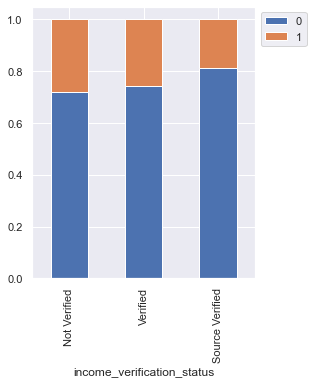

<IPython.core.display.Javascript object>

In [438]:
stacked_barplot(data, "income_verification_status", "default")

- Individuals whose income is not verified have a high chance of default.
- The least chance of default belongs to those individuals whose income is verified at source.

**Loan Purpose vs Default**

default                 0      1    All
loan_purpose                           
All                 71045  22129  93174
debt_consolidation  42408  12833  55241
credit_card         17006   4565  21571
other                7563   3408  10971
home_improvement     4068   1323   5391
------------------------------------------------------------------------------------------------------------------------


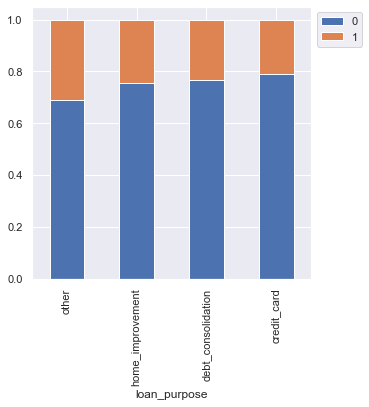

<IPython.core.display.Javascript object>

In [439]:
stacked_barplot(data, "loan_purpose", "default")

- Those talking loans with no clearly defined plan seem to have a high chance of defaulting.
- Credit card loans are the least defaulted on.

**State Code vs Default**

default         0      1    All
state_code                     
All         71045  22129  93174
CA           9905   3839  13744
NY           5886   1896   7782
TX           5748   1719   7467
FL           4876   1484   6360
IL           2864    835   3699
NJ           2640    824   3464
PA           2616    705   3321
GA           2324    674   2998
VA           2141    652   2793
OH           2467    637   3104
NC           2050    619   2669
MA           1648    584   2232
MD           1704    575   2279
AZ           1583    532   2115
WA           1517    521   2038
MI           1911    504   2415
CO           1431    493   1924
MN           1254    384   1638
NV            983    343   1326
MO           1144    341   1485
CT           1083    319   1402
OR            805    297   1102
AL            915    273   1188
WI            940    266   1206
SC            847    261   1108
LA            854    258   1112
IN           1188    232   1420
KY            731    202    933
TN      

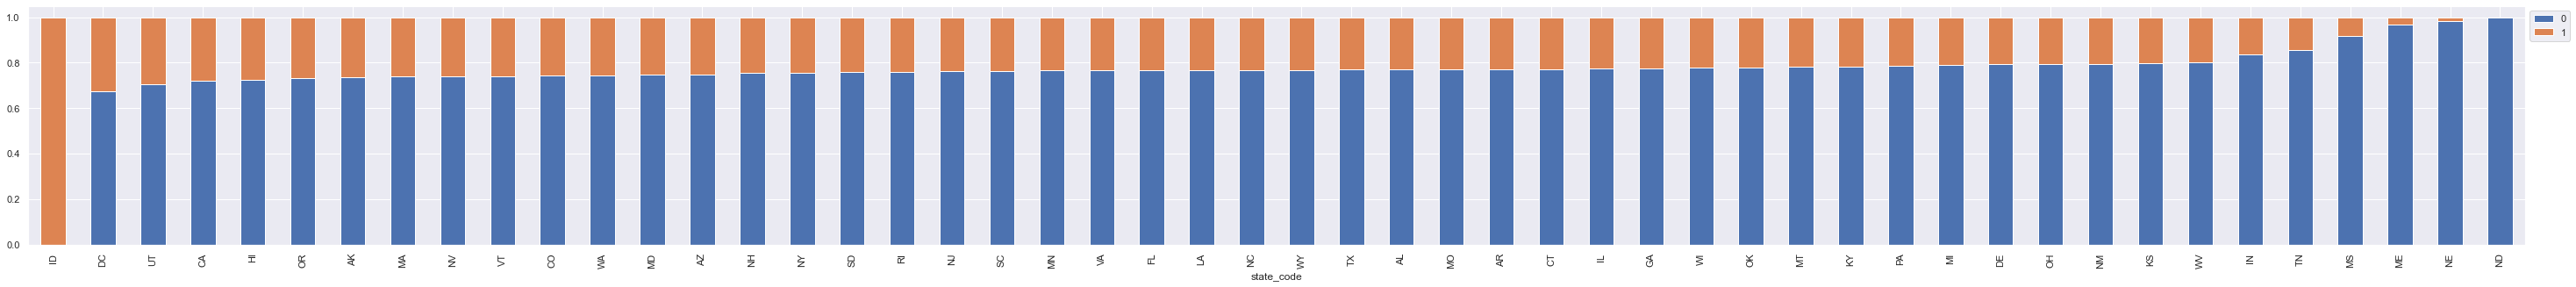

<IPython.core.display.Javascript object>

In [440]:
stacked_barplot(data, "state_code", "default")

- The only individual who took the loan from ID state code defaulted.
- None of the 45 loan takers from ND state has ever defaulted. 

**Delinq_2Yrs vs Default**

default          0      1    All
delinq_2yrs                     
All          71045  22127  93172
0.0          56778  18537  75315
1.0           9345   2457  11802
2.0           2812    698   3510
3.0           1093    239   1332
4.0            446    103    549
5.0            223     45    268
6.0            124     18    142
7.0             73     11     84
8.0             51      7     58
9.0             31      4     35
12.0            12      3     15
10.0            17      2     19
13.0             8      1      9
16.0             1      1      2
22.0             0      1      1
14.0             7      0      7
15.0             2      0      2
17.0             2      0      2
18.0             3      0      3
19.0             1      0      1
21.0             1      0      1
11.0            15      0     15
------------------------------------------------------------------------------------------------------------------------


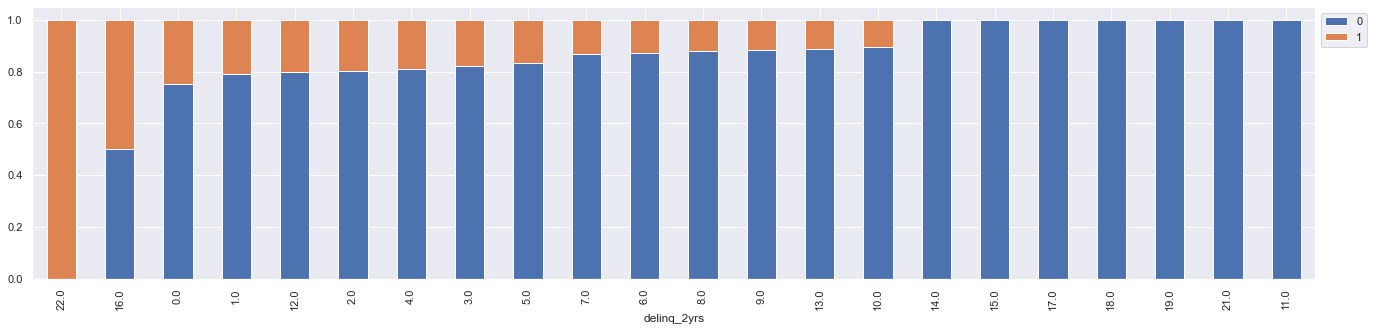

<IPython.core.display.Javascript object>

In [441]:
stacked_barplot(data, "delinq_2yrs", "default")

- Pattern is not very clear, it is random.

**Public Records vs Default**

default             0      1    All
public_records                     
All             71045  22127  93172
0.0             59530  19404  78934
1.0              9439   2410  11849
2.0              1323    227   1550
3.0               420     59    479
4.0               163     11    174
5.0                75      9     84
6.0                46      4     50
7.0                21      1     22
8.0                10      1     11
9.0                 8      1      9
10.0                4      0      4
11.0                2      0      2
12.0                2      0      2
13.0                1      0      1
49.0                1      0      1
------------------------------------------------------------------------------------------------------------------------


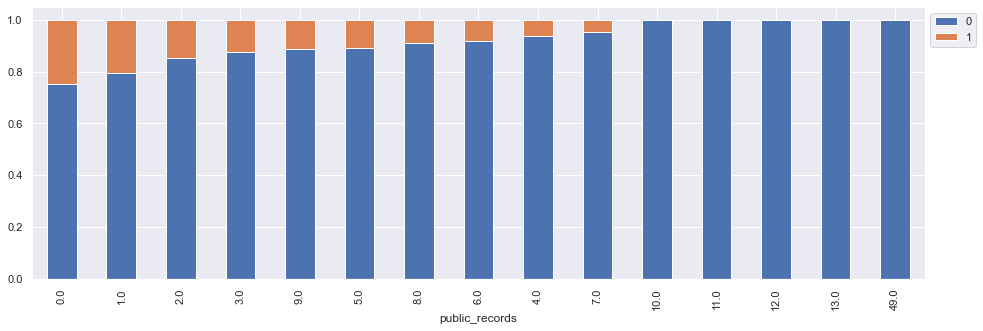

<IPython.core.display.Javascript object>

In [442]:
stacked_barplot(data, "public_records", "default")

- The lower the number of public records, the higher the chances of default.
- The person with 49 records has not defaulted on the loan repayments

**Total Accounts vs Default**

default        0      1    All
total_acc                     
All        71045  22127  93172
22.0        2619    857   3476
20.0        2617    826   3443
19.0        2596    799   3395
18.0        2436    785   3221
...          ...    ...    ...
86.0           4      0      4
81.0           4      0      4
78.0           6      0      6
73.0          20      0     20
77.0           7      0      7

[103 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


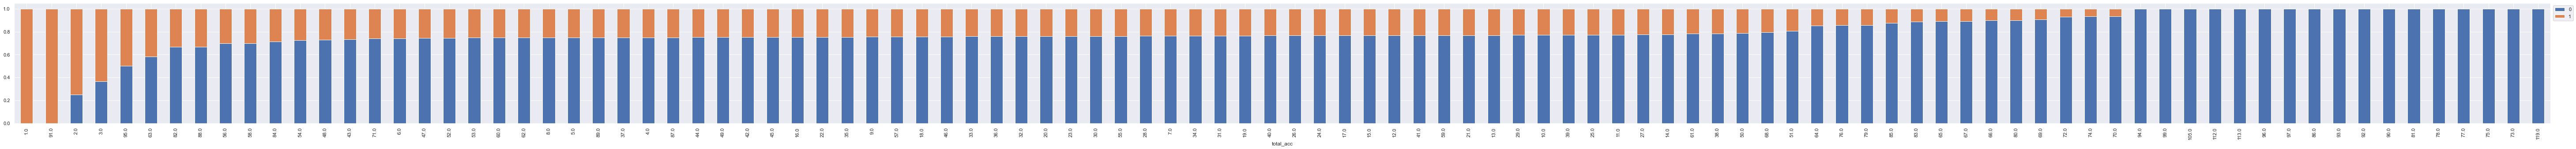

<IPython.core.display.Javascript object>

In [443]:
stacked_barplot(data, "total_acc", "default")

**Application Type vs Default**

default               0      1    All
application_type                     
INDIVIDUAL        70989  22129  93118
All               71045  22129  93174
JOINT                56      0     56
------------------------------------------------------------------------------------------------------------------------


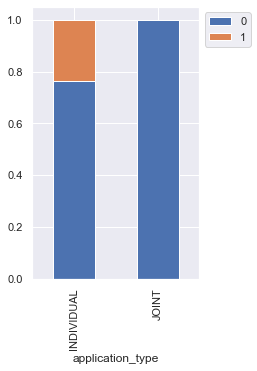

<IPython.core.display.Javascript object>

In [444]:
stacked_barplot(data, "application_type", "default")

- The 56 joint account applications have not defaulted.
- All defaulters are from the individual accounts only.

**Last week Pay vs Default**

default            0      1    All
last_week_pay                     
All            69121  22129  91250
156.0            109   1411   1520
161.0             71    957   1028
35.0            3339    846   4185
39.0            3334    788   4122
...              ...    ...    ...
192.0              1      2      3
270.0              0      2      2
256.0              4      1      5
274.0              0      1      1
291.0              0      1      1

[91 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


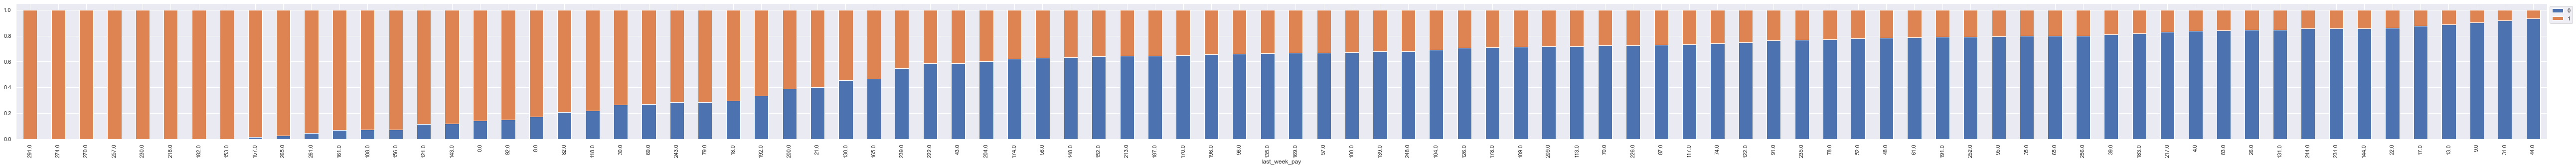

<IPython.core.display.Javascript object>

In [445]:
stacked_barplot(data, "last_week_pay", "default")

**Loan Amount vs Default**

<AxesSubplot:xlabel='default', ylabel='loan_amnt'>

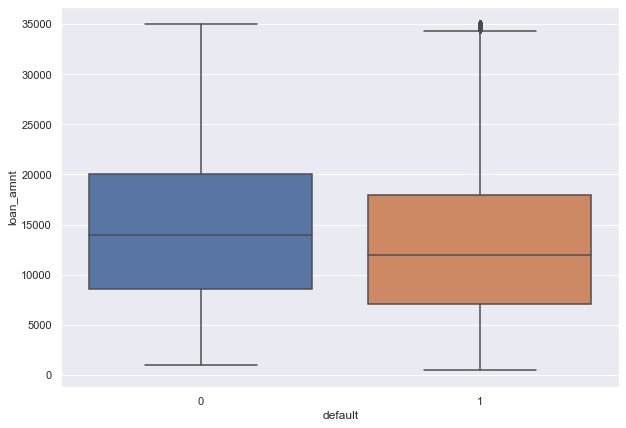

<IPython.core.display.Javascript object>

In [446]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="loan_amnt", data=data, orient="vertical")

- Most defaulters have a lower loan amount as compared to the non defaulters.

**Interest Rate vs Default**

<AxesSubplot:xlabel='default', ylabel='interest_rate'>

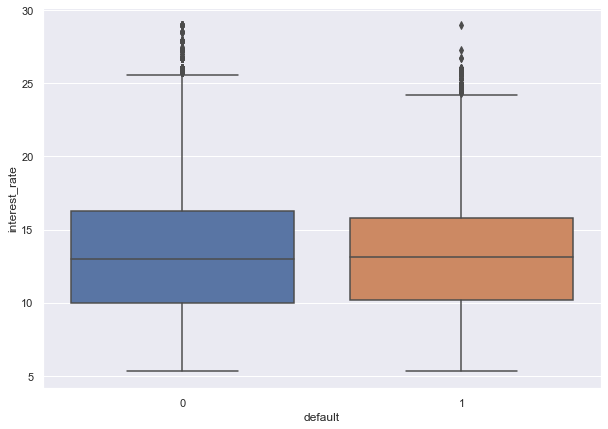

<IPython.core.display.Javascript object>

In [447]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="interest_rate", data=data, orient="vertical")

- No clear pattern difference between defaulters and non defaulters against paid interest rate.

**Annual Income vs Default**

<AxesSubplot:xlabel='default', ylabel='annual_income'>

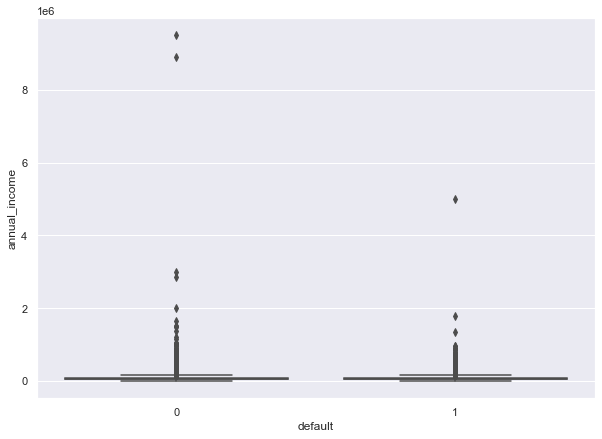

<IPython.core.display.Javascript object>

In [448]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="annual_income", data=data, orient="vertical")

- Has outliers on both defualters and non defaulters.
- The very high loan amounts are non defaulters.

**Debt to Income vs Default**

<AxesSubplot:xlabel='default', ylabel='debt_to_income'>

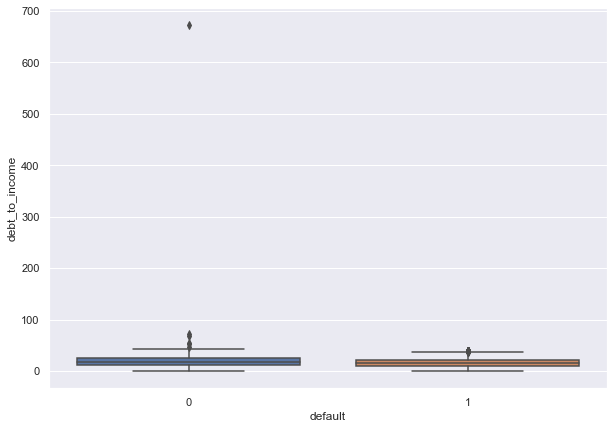

<IPython.core.display.Javascript object>

In [449]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="debt_to_income", data=data, orient="vertical")

- No clear difference.
- The outlier in debt to income belongs to the non defaulter categories.

**Revolving Balance vs Default**

<AxesSubplot:xlabel='default', ylabel='revolving_balance'>

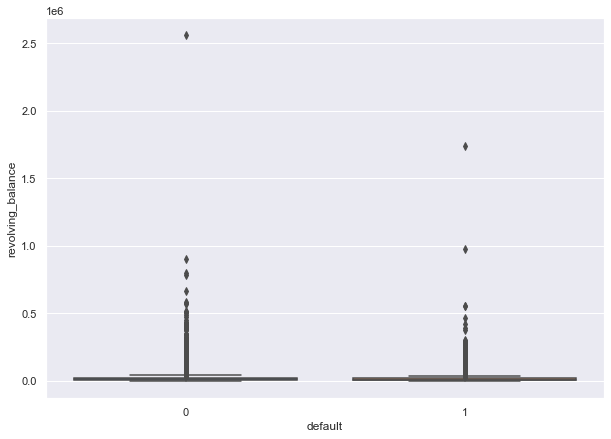

<IPython.core.display.Javascript object>

In [450]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="revolving_balance", data=data, orient="vertical")

- Outliers apperon both defualters and non defaulters for revolving balance.
- No clear pattern is visible.

**Total Accounts vs Default**

<AxesSubplot:xlabel='default', ylabel='total_acc'>

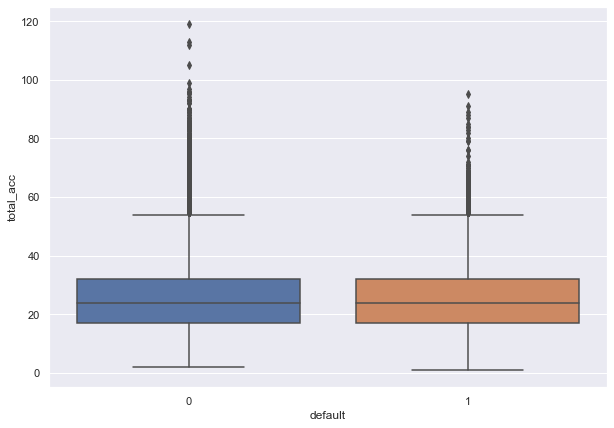

<IPython.core.display.Javascript object>

In [451]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="total_acc", data=data, orient="vertical")

- Outliers in number of total accounts for non defualters.
- No clear defining difference.

**Interest Received by Bank vs Default**

<AxesSubplot:xlabel='default', ylabel='interest_receive'>

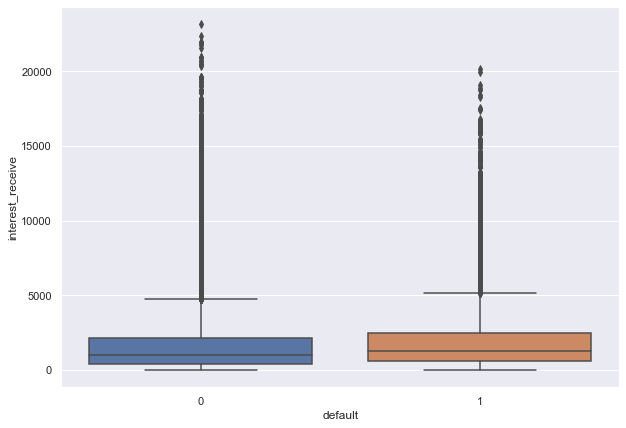

<IPython.core.display.Javascript object>

In [452]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="interest_receive", data=data, orient="vertical")

- The average amount paid by defaulters  to the bank as interest is higher than that paid by non defaulters.
- Outliers exist in both sets of customers.

**Total Current Balance vs Default**

<AxesSubplot:xlabel='default', ylabel='total_current_balance'>

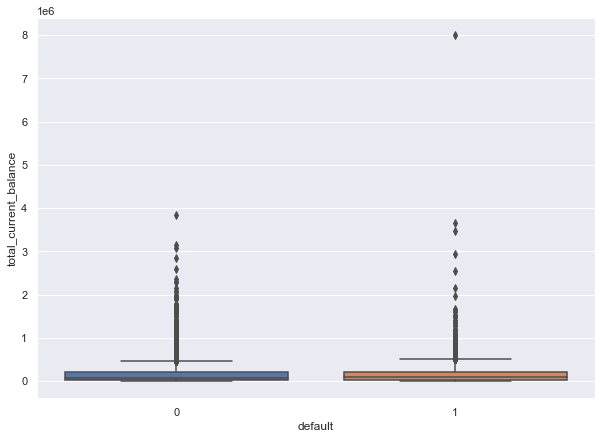

<IPython.core.display.Javascript object>

In [453]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="total_current_balance", data=data, orient="vertical")

- The person with the highest total current balance is a defaulter. This is clearly an outlier and if not treated might impact the predictions negatively.
- No clear differentiating pattern.

**Total Revolving Limit vs Default**

<AxesSubplot:xlabel='default', ylabel='total_revolving_limit'>

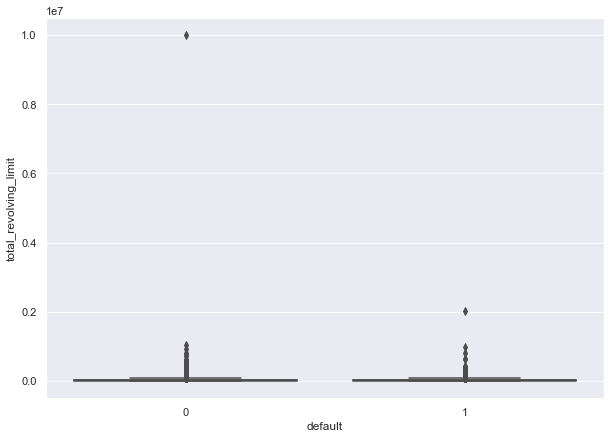

<IPython.core.display.Javascript object>

In [454]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="total_revolving_limit", data=data, orient="vertical")

- Has outliers on both data sets.

**Last week Pay vs Default**

<AxesSubplot:xlabel='default', ylabel='last_week_pay'>

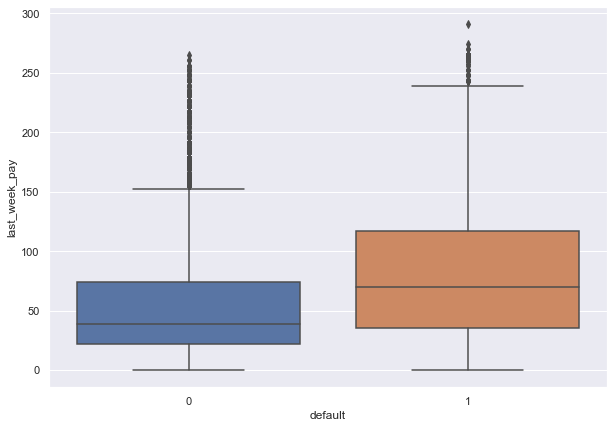

<IPython.core.display.Javascript object>

In [455]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="default", y="last_week_pay", data=data, orient="vertical")

- Defaulters take more time to clear their loan debt payments past the due date.

### Correlation Analysis

<AxesSubplot:>

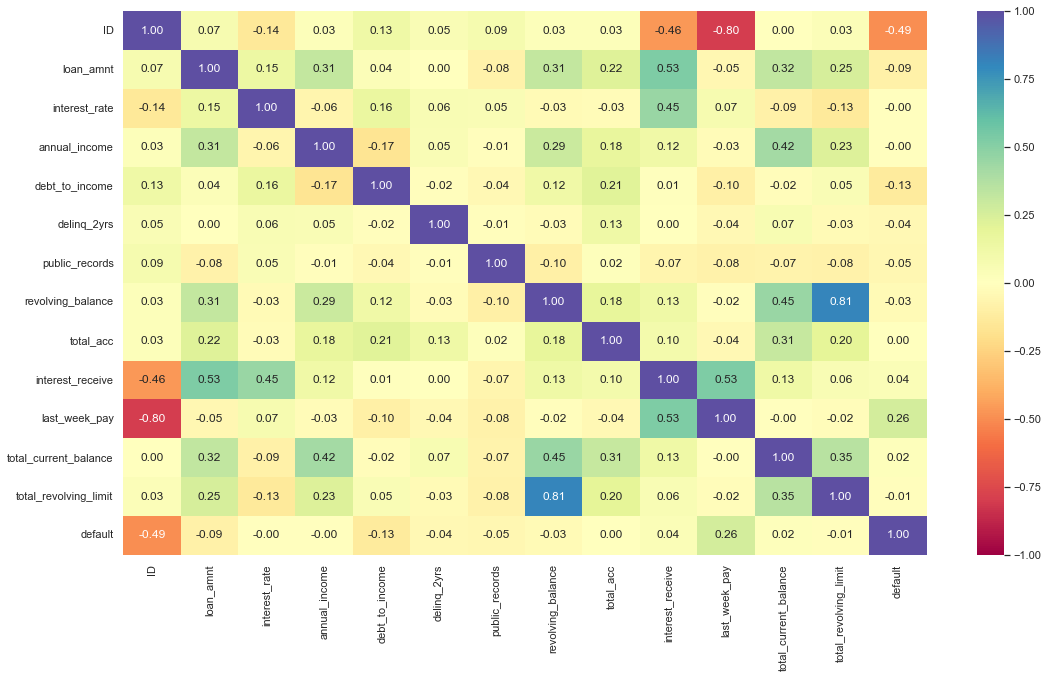

<IPython.core.display.Javascript object>

In [456]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

- High correlation between ID and Last week pay but we will drop ID as it is a unique column.
- High correlation between revolving balance and total current balance at 81%.
- Default is not showing any high correlation with any of the independent variables.

In [457]:
def get_feature_correlation(
    df,
    top_n=None,
    corr_method="spearman",
    remove_duplicates=True,
    remove_self_correlations=True,
):
    """
    Compute the feature correlation and sort feature pairs based on their correlation

    :param df: The dataframe with the predictor variables
    :type df: pandas.core.frame.DataFrame
    :param top_n: Top N feature pairs to be reported (if None, all of the pairs will be returned)
    :param corr_method: Correlation compuation method
    :type corr_method: str
    :param remove_duplicates: Indicates whether duplicate features must be removed
    :type remove_duplicates: bool
    :param remove_self_correlations: Indicates whether self correlations will be removed
    :type remove_self_correlations: bool

    :return: pandas.core.frame.DataFrame
    """
    corr_matrix_abs = df.corr(method=corr_method).abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us.sort_values(
        kind="quicksort", ascending=False
    ).reset_index()

    # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ["Feature 1", "Feature 2", "Correlation (abs)"]

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

<IPython.core.display.Javascript object>

In [458]:
get_feature_correlation(data).head(20)

,Feature 1,Feature 2,Correlation (abs)
14,ID,last_week_pay,0.844
16,revolving_balance,total_revolving_limit,0.785
18,interest_receive,last_week_pay,0.681
20,interest_receive,ID,0.588
22,interest_receive,loan_amnt,0.545
24,total_current_balance,annual_income,0.528
26,default,ID,0.506
28,annual_income,loan_amnt,0.505
30,loan_amnt,revolving_balance,0.497
32,total_revolving_limit,loan_amnt,0.459


<IPython.core.display.Javascript object>

### Count of categorical Variables

In [459]:
cols = data.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(data[i].value_counts())
    print("*" * 30)

3 years    65211
5 years    27963
Name: loan_term, dtype: int64
******************************
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64
******************************
B3    5879
B4    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: loan_subgrade, dtype: int64
******************************
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: job_experience, dtype: int64
******************************
MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: home_ownership, dtype: int64
******************************
Source Verified    34487
Verified 

<IPython.core.display.Javascript object>

- Income Verification Status appears to be correctly coded.
- Loan purpose category Other is also correctly coded.
- Most loans are of category B and C. G and F are very few.
- Most loan accounts are individual applied as opposed to joint applied.

### Missing Value Detection

In [460]:
data.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

<IPython.core.display.Javascript object>

**Inspecting missing values in Annual Income**

In [461]:
data[data["annual_income"].isna()]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
82922,70735,6500,3 years,8.380,A,A5,<5 Years,NONE,NaN,Not Verified,other,NY,4.000,NaN,NaN,0,NaN,873.830,INDIVIDUAL,157.000,NaN,NaN,1


<IPython.core.display.Javascript object>

- Most other entries for this record are missing and we can drop it without losing much of the information in the data set.

In [462]:
# Drop the data at index 82922 which has missing records in a number of its columns.
data.drop(index=82922, inplace=True)

<IPython.core.display.Javascript object>

**Inspecting missing values in delinq_2yrs**

In [463]:
data[data["delinq_2yrs"].isna()]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
79795,72816,7200,3 years,10.280,C,C1,<5 Years,RENT,95000.000,Not Verified,other,NY,10.000,NaN,NaN,0,NaN,843.330,INDIVIDUAL,157.000,NaN,NaN,1


<IPython.core.display.Javascript object>

- Most other entries for this record are missing and we can drop it without losing much of the information in the data set.

In [464]:
# Drop the data at index 82922 which has missing records in a number of its columns.
data.drop(index=79795, inplace=True)

<IPython.core.display.Javascript object>

**Inspecting missing values in job_experience**

In [465]:
data[data["job_experience"].isna()]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
3,46974169,25000,3 years,13.990,C,C4,NaN,MORTGAGE,59800.000,Verified,debt_consolidation,MO,37.390,0.000,0.000,35020,35.000,1106.720,INDIVIDUAL,17.000,183208.000,55400.000,0
12,39061792,28000,3 years,8.190,A,A5,NaN,MORTGAGE,100000.000,Verified,credit_card,TX,28.410,0.000,0.000,35522,28.000,1963.030,INDIVIDUAL,57.000,287228.000,81000.000,0
15,752536,4000,5 years,10.750,B,B2,NaN,RENT,13212.000,Source Verified,other,CA,6.270,0.000,0.000,1058,8.000,363.770,INDIVIDUAL,61.000,NaN,NaN,1
55,14787622,20000,3 years,12.490,B,B4,NaN,RENT,108000.000,Verified,debt_consolidation,LA,14.720,0.000,0.000,6198,18.000,3390.890,INDIVIDUAL,96.000,19327.000,7000.000,0
60,1695062,2800,3 years,7.900,A,A4,NaN,RENT,10068.000,Verified,other,NM,31.230,0.000,0.000,7502,15.000,36.320,INDIVIDUAL,9.000,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93135,70267915,14400,3 years,9.170,B,B2,NaN,MORTGAGE,66924.000,Not Verified,credit_card,GA,15.220,3.000,0.000,12434,30.000,95.370,INDIVIDUAL,4.000,228123.000,20700.000,0
93137,59673050,6000,3 years,7.890,A,A5,NaN,MORTGAGE,48132.000,Not Verified,home_improvement,MI,29.970,0.000,1.000,2450,29.000,184.810,INDIVIDUAL,22.000,40576.000,29900.000,0
93156,68309440,12000,5 years,16.550,D,D2,NaN,OWN,45000.000,Verified,credit_card,CT,11.790,1.000,0.000,5908,14.000,312.660,INDIVIDUAL,9.000,11227.000,26900.000,0
93167,53312784,7800,3 years,12.290,C,C1,NaN,MORTGAGE,21000.000,Verified,debt_consolidation,NY,12.970,0.000,0.000,8197,8.000,479.810,INDIVIDUAL,31.000,93130.000,17200.000,0


<IPython.core.display.Javascript object>

- Missing values in Job Experience appears to be random and we will fill it with "<5 Years" which is the most frequent value.

In [466]:
data["job_experience"] = data["job_experience"].fillna("<5 Years")

<IPython.core.display.Javascript object>

**Inspecting missing values in last_week_pay**

In [467]:
data[data["last_week_pay"].isna()].head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
10,72929868,30000,3 years,13.990,C,C4,<5 Years,MORTGAGE,80000.000,Source Verified,credit_card,TX,35.250,2.000,0.000,29489,26.000,0.000,INDIVIDUAL,NaN,152259.000,87400.000,0
81,72399558,10000,3 years,5.320,A,A1,6-10 years,MORTGAGE,118000.000,Not Verified,other,CA,12.540,0.000,0.000,16148,37.000,0.000,INDIVIDUAL,NaN,452972.000,140000.000,0
186,72960239,9000,3 years,5.320,A,A1,10+ years,MORTGAGE,71000.000,Not Verified,debt_consolidation,OK,16.140,0.000,0.000,2741,22.000,0.000,INDIVIDUAL,NaN,120040.000,31600.000,0
331,72658632,15000,3 years,11.220,B,B5,6-10 years,MORTGAGE,123000.000,Source Verified,debt_consolidation,TX,17.260,0.000,1.000,9969,25.000,0.000,INDIVIDUAL,NaN,234933.000,30000.000,0
352,72707236,12000,5 years,13.670,C,C4,<5 Years,RENT,63000.000,Source Verified,credit_card,TX,17.180,0.000,0.000,12107,14.000,0.000,INDIVIDUAL,NaN,41704.000,18600.000,0


<IPython.core.display.Javascript object>

In [468]:
data[((data["last_week_pay"].isna()) & (data["interest_receive"] != 0))]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default


<IPython.core.display.Javascript object>

- All rows where last week pay is null have an interest received value of 0.

In [469]:
data[data["last_week_pay"] == 0]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
128,70227944,18650,3 years,10.640,B,B4,<5 Years,MORTGAGE,110000.000,Not Verified,debt_consolidation,NY,28.390,0.000,0.000,36793,34.000,110.240,INDIVIDUAL,0.000,466163.000,76100.000,0
929,63536295,32500,5 years,17.570,D,D4,10+ years,MORTGAGE,65000.000,Source Verified,home_improvement,NY,24.910,1.000,0.000,22955,28.000,174.490,INDIVIDUAL,0.000,73718.000,52400.000,1
2848,65136630,19000,5 years,22.990,F,F2,6-10 years,MORTGAGE,62466.000,Verified,debt_consolidation,IN,22.320,0.000,0.000,7669,25.000,530.600,INDIVIDUAL,0.000,237523.000,16100.000,1
3887,36144924,7800,3 years,8.670,B,B1,6-10 years,MORTGAGE,78000.000,Not Verified,debt_consolidation,TN,6.890,0.000,1.000,4205,20.000,24.420,INDIVIDUAL,0.000,108071.000,7100.000,1
4170,51411449,30000,3 years,16.550,D,D2,<5 Years,MORTGAGE,101000.000,Source Verified,debt_consolidation,OH,19.150,0.000,0.000,17971,45.000,108.270,INDIVIDUAL,0.000,142283.000,41000.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91851,65527179,9800,3 years,12.690,C,C2,<5 Years,MORTGAGE,135000.000,Not Verified,debt_consolidation,TX,11.010,0.000,0.000,8893,25.000,11.400,INDIVIDUAL,0.000,30521.000,36050.000,1
91997,56489454,4950,3 years,14.650,C,C5,<5 Years,MORTGAGE,60000.000,Verified,debt_consolidation,WA,19.880,0.000,1.000,3479,20.000,34.250,INDIVIDUAL,0.000,277952.000,7000.000,1
92875,54037069,25000,5 years,10.990,B,B4,10+ years,MORTGAGE,215000.000,Source Verified,other,NJ,3.820,0.000,0.000,3032,32.000,57.250,INDIVIDUAL,0.000,386393.000,33300.000,1
93068,61636337,25200,5 years,20.990,E,E5,10+ years,MORTGAGE,70000.000,Source Verified,other,IL,12.240,1.000,0.000,3981,16.000,33.060,INDIVIDUAL,0.000,335217.000,4674.000,1


<IPython.core.display.Javascript object>

- Some interest is received even if the last week pay is zero so we cannot say that the missing value for last week pay is 0.
- We need to investigate further.

In [470]:
data[
    ((data["interest_receive"] == 0) & (data["last_week_pay"].notna()))
].value_counts().sum()

60

<IPython.core.display.Javascript object>

- We have columns where the interest received is zero and the last week pay is not zero. We will inspect this column for any insights.

In [471]:
data[((data["interest_receive"] == 0) & (data["last_week_pay"].notna()))].head(10)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
4956,73295682,28000,5 years,10.780,B,B4,6-10 years,MORTGAGE,120000.000,Verified,debt_consolidation,TX,32.580,0.000,0.000,69878,29.000,0.000,INDIVIDUAL,4.000,294952.000,90280.000,0
5689,72248300,17000,3 years,9.170,B,B2,6-10 years,OWN,45000.000,Not Verified,credit_card,PA,17.760,0.000,0.000,7463,11.000,0.000,INDIVIDUAL,4.000,92408.000,21000.000,0
7336,72259242,4000,3 years,16.550,D,D2,<5 Years,RENT,13500.000,Verified,other,IL,17.420,0.000,1.000,1716,14.000,0.000,INDIVIDUAL,0.000,15563.000,6500.000,0
8365,71251594,10000,3 years,11.220,B,B5,6-10 years,MORTGAGE,90000.000,Source Verified,debt_consolidation,TX,11.090,1.000,0.000,2176,15.000,0.000,INDIVIDUAL,4.000,229364.000,5000.000,0
8685,71159353,5000,3 years,8.380,B,B1,10+ years,RENT,52000.000,Source Verified,other,CA,19.780,1.000,0.000,10300,15.000,0.000,INDIVIDUAL,4.000,38672.000,10500.000,0
11930,72070986,11200,3 years,6.890,A,A3,<5 Years,RENT,66000.000,Not Verified,debt_consolidation,MN,29.450,0.000,0.000,2405,39.000,0.000,INDIVIDUAL,4.000,46504.000,26000.000,0
15287,72777408,35000,3 years,8.380,B,B1,10+ years,MORTGAGE,97379.000,Source Verified,debt_consolidation,GA,14.440,0.000,0.000,42703,36.000,0.000,INDIVIDUAL,4.000,182255.000,113000.000,0
16441,71339099,7500,3 years,11.220,B,B5,10+ years,MORTGAGE,150000.000,Verified,debt_consolidation,AL,15.900,0.000,0.000,9875,21.000,0.000,INDIVIDUAL,4.000,73236.000,19800.000,0
19279,70741516,5000,3 years,7.260,A,A4,<5 Years,MORTGAGE,45000.000,Verified,debt_consolidation,NY,2.080,0.000,0.000,1238,5.000,0.000,INDIVIDUAL,4.000,1238.000,15300.000,0
19300,70648930,5400,3 years,10.640,B,B4,<5 Years,MORTGAGE,40000.000,Source Verified,debt_consolidation,FL,7.680,1.000,0.000,9117,10.000,0.000,INDIVIDUAL,4.000,142433.000,18300.000,0


<IPython.core.display.Javascript object>

- On a further inspection, all these rows with interest of 0 and a value other than Null in last week to pay, have a mode pay value of 4, with very few instances of 0. 
- We assume that this is a 0 and will therefore replace these NaN values in last week pay with 0.0. 
- This also ensures that we do not alter the graph of the variable so much (If we use 4.0 the graph will be altered so much).

In [472]:
data["last_week_pay"] = data["last_week_pay"].fillna(0.0)

<IPython.core.display.Javascript object>

In [473]:
data.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                   0
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      0
public_records                   0
revolving_balance                0
total_acc                        0
interest_receive                 0
application_type                 0
last_week_pay                    0
total_current_balance         7384
total_revolving_limit         7384
default                          0
dtype: int64

<IPython.core.display.Javascript object>

**Inspecting missing values in total_current_balance**

In [474]:
data[((data["total_current_balance"].isna()) & (data["total_revolving_limit"].notna()))]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default


<IPython.core.display.Javascript object>

In [475]:
data[((data["total_current_balance"].notna()) & (data["total_revolving_limit"].isna()))]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default


<IPython.core.display.Javascript object>

In [476]:
data[data["total_current_balance"].isna()]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
13,1449627,35000,3 years,20.500,E,E2,<5 Years,RENT,75000.000,Verified,debt_consolidation,NY,4.440,1.000,0.000,9993,18.000,5398.080,INDIVIDUAL,44.000,NaN,NaN,1
15,752536,4000,5 years,10.750,B,B2,<5 Years,RENT,13212.000,Source Verified,other,CA,6.270,0.000,0.000,1058,8.000,363.770,INDIVIDUAL,61.000,NaN,NaN,1
45,772745,10000,3 years,9.990,B,B4,10+ years,MORTGAGE,125000.000,Not Verified,debt_consolidation,NJ,15.590,1.000,0.000,2061,18.000,1601.950,INDIVIDUAL,152.000,NaN,NaN,1
47,1467604,10000,3 years,13.110,B,B4,10+ years,MORTGAGE,116943.000,Source Verified,other,CA,19.910,0.000,0.000,41692,42.000,2145.370,INDIVIDUAL,156.000,NaN,NaN,1
60,1695062,2800,3 years,7.900,A,A4,<5 Years,RENT,10068.000,Verified,other,NM,31.230,0.000,0.000,7502,15.000,36.320,INDIVIDUAL,9.000,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93046,1424622,6000,3 years,8.900,A,A5,10+ years,RENT,42000.000,Source Verified,credit_card,CA,15.460,0.000,0.000,17306,13.000,856.690,INDIVIDUAL,156.000,NaN,NaN,1
93069,975134,13000,3 years,12.990,C,C1,6-10 years,MORTGAGE,45600.000,Source Verified,debt_consolidation,VA,14.180,0.000,0.000,9538,9.000,2513.910,INDIVIDUAL,113.000,NaN,NaN,1
93138,1006693,10000,3 years,9.990,B,B1,6-10 years,MORTGAGE,44000.000,Source Verified,debt_consolidation,WI,9.980,0.000,0.000,10012,23.000,1610.320,INDIVIDUAL,157.000,NaN,NaN,1
93151,940830,9000,3 years,8.490,A,A5,10+ years,MORTGAGE,91200.000,Not Verified,other,VA,0.000,0.000,0.000,0,10.000,700.340,INDIVIDUAL,57.000,NaN,NaN,0


<IPython.core.display.Javascript object>

- All the values that are missing in total current balance are also missing in total revolving limit.
- Since these columns have extreme values of outliers, we will impute them using median as opposed to mean.
- We will treat these missing values after splitting the test data from the train and validationdata sets to prevent data leakage

### Missing Value Treatment

**Treat missing values in the total revolving limit and total current balance using the median of the remianing rows.**

In [477]:
# We impute missing values, we will use mode to impute missing values in savings and checking accounts

imp_mode = SimpleImputer(missing_values=np.nan, strategy="median")
cols_to_impute = ["total_revolving_limit", "total_current_balance"]

# Fit and transform the imputer on train data
data[cols_to_impute] = imp_mode.fit_transform(data[cols_to_impute])

<IPython.core.display.Javascript object>

In [478]:
data.isna().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

<IPython.core.display.Javascript object>

- All missing values have been populated.

### Outlier Detection and Treatment

**We define the upper and lower quartiles of all the numerical data columns and clip the outliers to these levels.**

In [479]:
Q1 = data.quantile(0.25)  # Find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)  # Find the 75th percentile and 75th percentile.

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100


ID                       0.000
loan_amnt                0.000
interest_rate            0.655
annual_income            4.509
debt_to_income           0.010
delinq_2yrs             19.166
public_records          15.281
revolving_balance        5.414
total_acc                2.093
interest_receive         7.262
last_week_pay            0.763
total_current_balance    4.106
total_revolving_limit    6.414
default                 23.749
dtype: float64

<IPython.core.display.Javascript object>

In [480]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

**Outlier detection using boxplot - Before Treatment**

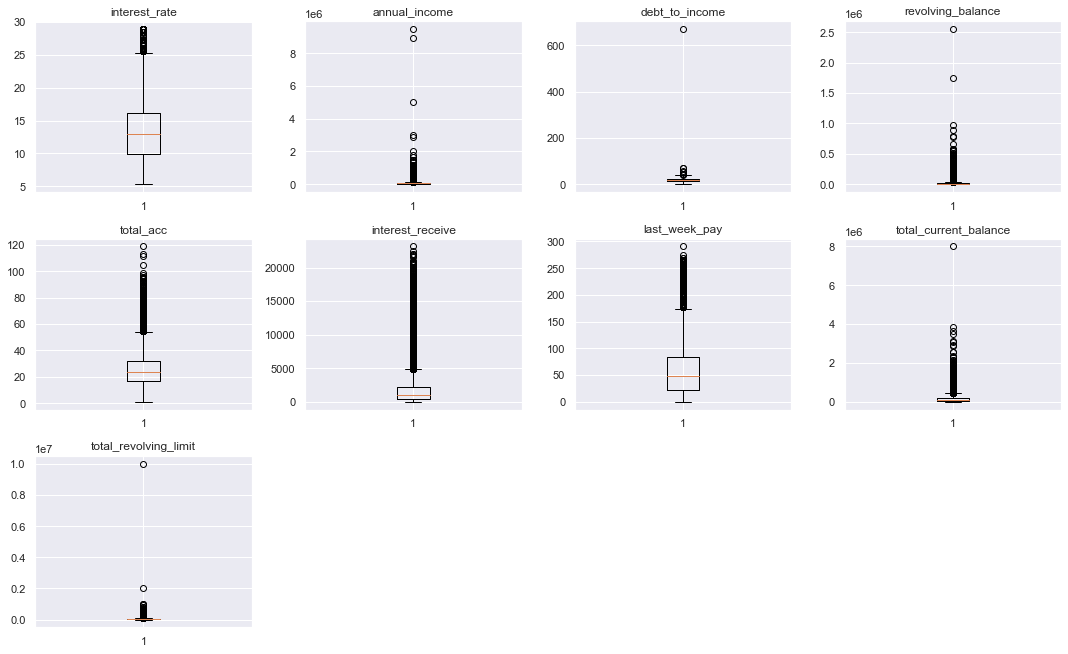

<IPython.core.display.Javascript object>

In [481]:
numeric_columns = [
    "interest_rate",
    "annual_income",
    "debt_to_income",
    "revolving_balance",
    "total_acc",
    "interest_receive",
    "last_week_pay",
    "total_current_balance",
    "total_revolving_limit",
]

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Treat the outliers**

In [482]:
data = treat_outliers_all(data, numeric_columns)

<IPython.core.display.Javascript object>

**Outlier detection using boxplot - After Treatment**

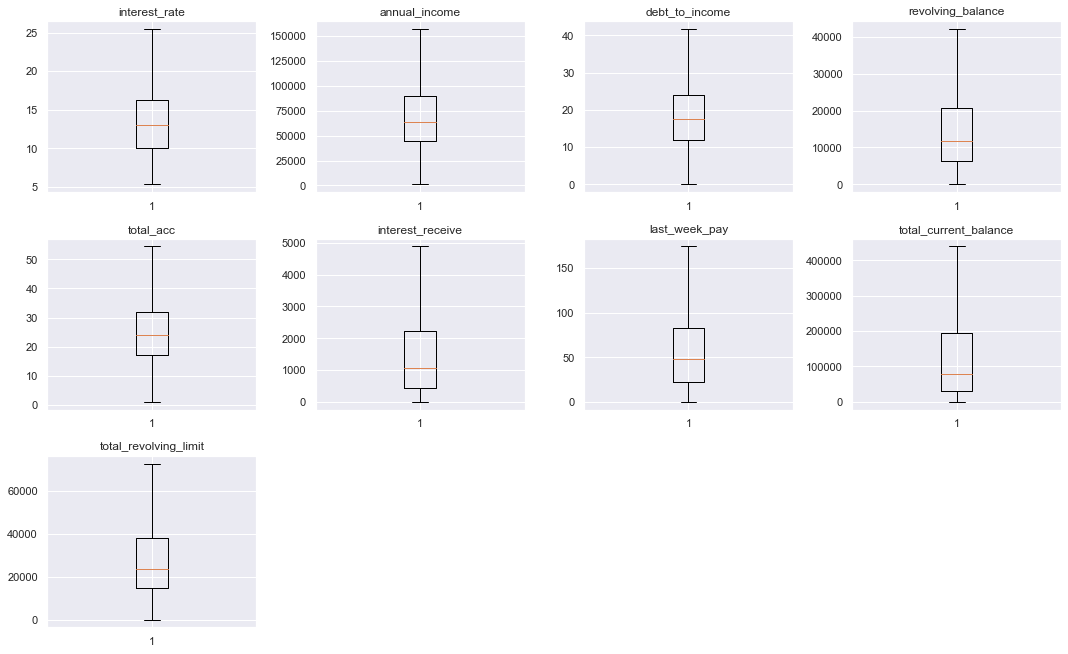

<IPython.core.display.Javascript object>

In [483]:
# outlier detection using boxplot
numeric_columns = [
    "interest_rate",
    "annual_income",
    "debt_to_income",
    "revolving_balance",
    "total_acc",
    "interest_receive",
    "last_week_pay",
    "total_current_balance",
    "total_revolving_limit",
]

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Using a formular to check for the presence of outliers in the independent input variables**

In [484]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100


ID                       0.000
loan_amnt                0.000
interest_rate            0.000
annual_income            0.000
debt_to_income           0.000
delinq_2yrs             19.166
public_records          15.281
revolving_balance        0.000
total_acc                0.000
interest_receive         0.000
last_week_pay            0.000
total_current_balance    0.000
total_revolving_limit    0.000
default                 23.749
dtype: float64

<IPython.core.display.Javascript object>

- **The variable delinq_2yrs has most of the calues as 0**
- We will convert this variable into a categorical column of two values, either 0 or 1.

In [485]:
data["delinq_2yrs"] = data["delinq_2yrs"].map(lambda x: 0 if x == 0 else 1)
data["delinq_2yrs"] = data["delinq_2yrs"].astype("category")
data["delinq_2yrs"].value_counts()

0    75315
1    17857
Name: delinq_2yrs, dtype: int64

<IPython.core.display.Javascript object>

- **The variable public_records has most of the calues as 0**
- We will convert this variable into a categorical column of two values, either 0 or 1.

In [486]:
data["public_records"] = data["public_records"].map(lambda x: 0 if x == 0 else 1)
data["public_records"] = data["public_records"].astype("category")
data["public_records"].value_counts()

0    78934
1    14238
Name: public_records, dtype: int64

<IPython.core.display.Javascript object>

In [487]:
cat_cols = data.select_dtypes(include="object").columns.tolist()
cat_cols

['loan_term',
 'loan_grade',
 'loan_subgrade',
 'job_experience',
 'home_ownership',
 'income_verification_status',
 'loan_purpose',
 'state_code',
 'application_type']

<IPython.core.display.Javascript object>

In [488]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "loan_term",
    "loan_grade",
    "loan_subgrade",
    "job_experience",
    "home_ownership",
    "income_verification_status",
    "loan_purpose",
    "state_code",
    "application_type",
]
data[cat_cols] = data[cat_cols].astype("category")

<IPython.core.display.Javascript object>

In [489]:
data.dtypes

ID                               int64
loan_amnt                        int64
loan_term                     category
interest_rate                  float64
loan_grade                    category
loan_subgrade                 category
job_experience                category
home_ownership                category
annual_income                  float64
income_verification_status    category
loan_purpose                  category
state_code                    category
debt_to_income                 float64
delinq_2yrs                   category
public_records                category
revolving_balance              float64
total_acc                      float64
interest_receive               float64
application_type              category
last_week_pay                  float64
total_current_balance          float64
total_revolving_limit          float64
default                          int64
dtype: object

<IPython.core.display.Javascript object>

In [490]:
data.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.170,B,B2,<5 Years,OWN,85000.000,Not Verified,debt_consolidation,NC,26.680,0,0,39519.000,20.000,59.600,INDIVIDUAL,4.000,95493.000,72700.000,0
1,14257956,18000,3 years,13.650,C,C1,<5 Years,OWN,64000.000,Verified,debt_consolidation,SC,31.670,0,1,9783.000,24.000,3348.250,INDIVIDUAL,95.000,185433.000,13500.000,0
2,66216451,16000,3 years,7.260,A,A4,<5 Years,MORTGAGE,150000.000,Source Verified,debt_consolidation,TX,19.700,1,0,13641.000,27.000,276.690,INDIVIDUAL,13.000,180519.000,19300.000,0
3,46974169,25000,3 years,13.990,C,C4,<5 Years,MORTGAGE,59800.000,Verified,debt_consolidation,MO,37.390,0,0,35020.000,35.000,1106.720,INDIVIDUAL,17.000,183208.000,55400.000,0
4,46725961,17000,3 years,6.390,A,A2,10+ years,MORTGAGE,72000.000,Source Verified,credit_card,TX,8.920,0,0,23990.000,26.000,725.290,INDIVIDUAL,39.000,23990.000,72700.000,0


<IPython.core.display.Javascript object>

In [491]:
data["default"].value_counts(normalize=True)

0   0.763
1   0.237
Name: default, dtype: float64

<IPython.core.display.Javascript object>

- Target variable is highly imbalanced. We will use oversampling and undersampling techniques to try and balance the data to check whether perfomance will improve.

## Data Preparation for Modeling

- **Drop the unique variable ID as it adds no meaningful information**
- **Drop the variable loan grade as it has been captured in loan subgrade**
- **We trial a solution without state code first and see how it perfoams before re introducing it for another review**

In [492]:
df = data.copy()
df = df.drop(["ID"], axis=1)

<IPython.core.display.Javascript object>

### Define Target Variable and Independent Variables

In [493]:
x = df.drop(["default",], axis=1)
y = df["default"]

<IPython.core.display.Javascript object>

**Spliting Data into Train, Validation and Test Sets to prevent data Leakage**

In [494]:
# We split data into training, validation and test sets;
# First we split data into 2 parts, say temporary and test. We then use temporary to get trainin and validation sets

X_temp, X_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(55902, 21) (18635, 21) (18635, 21)


<IPython.core.display.Javascript object>

In [495]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 55902
Number of rows in validation data = 18635
Number of rows in test data = 18635


<IPython.core.display.Javascript object>

### Missing Value Treatment

In [496]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64
------------------------------
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status  

<IPython.core.display.Javascript object>

#### `Train Dataset`

In [497]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

3 years    39074
5 years    16828
Name: loan_term, dtype: int64
******************************
B    16231
C    15392
A     9334
D     8779
E     4434
F     1398
G      334
Name: loan_grade, dtype: int64
******************************
B3    3570
B4    3527
C2    3264
C1    3257
C3    3145
C4    3107
B2    3106
B5    3024
B1    3004
A5    2848
C5    2619
D1    2183
A4    2155
D2    1956
D3    1682
D4    1611
A3    1472
A2    1432
A1    1427
D5    1347
E1    1152
E2    1029
E3     938
E4     717
E5     598
F1     461
F2     329
F3     278
F4     207
F5     123
G1     108
G2      88
G3      59
G4      40
G5      39
Name: loan_subgrade, dtype: int64
******************************
<5 Years      27056
10+ years     18226
6-10 years    10620
Name: job_experience, dtype: int64
******************************
MORTGAGE    27927
RENT        22393
OWN          5563
OTHER          15
NONE            4
Name: home_ownership, dtype: int64
******************************
Source Verified    20839
Verified 

<IPython.core.display.Javascript object>

#### `Validation Dataset`

In [498]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

3 years    13041
5 years     5594
Name: loan_term, dtype: int64
******************************
C    5268
B    5208
A    3125
D    2983
E    1485
F     448
G     118
Name: loan_grade, dtype: int64
******************************
B4    1144
C1    1115
B3    1112
C2    1099
C4    1050
C3    1050
B2    1041
B5    1004
C5     954
A5     932
B1     907
A4     762
D1     761
D2     634
D4     558
D3     553
A3     482
A1     478
D5     477
A2     471
E1     395
E2     346
E3     300
E4     253
E5     191
F1     137
F2     102
F3      88
F4      72
F5      49
G1      34
G2      33
G3      25
G5      16
G4      10
Name: loan_subgrade, dtype: int64
******************************
<5 Years      9127
10+ years     6078
6-10 years    3430
Name: job_experience, dtype: int64
******************************
MORTGAGE    9253
RENT        7521
OWN         1858
NONE           2
OTHER          1
Name: home_ownership, dtype: int64
******************************
Source Verified    6869
Verified           6073
N

<IPython.core.display.Javascript object>

#### `Test Dataset`

In [499]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

3 years    13094
5 years     5541
Name: loan_term, dtype: int64
******************************
B    5426
C    5126
A    3074
D    2953
E    1459
F     498
G      99
Name: loan_grade, dtype: int64
******************************
B4    1208
B3    1197
C2    1116
C3    1075
C1    1070
B5    1067
C4    1025
B2    1022
A5     942
B1     932
C5     840
D1     772
A4     714
D2     649
D4     548
D3     524
A3     496
A1     472
D5     460
A2     450
E1     377
E2     361
E3     275
E4     258
E5     188
F1     147
F2     114
F3      99
F4      76
F5      62
G1      32
G2      25
G3      21
G5      11
G4      10
Name: loan_subgrade, dtype: int64
******************************
<5 Years      9127
10+ years     6058
6-10 years    3450
Name: job_experience, dtype: int64
******************************
MORTGAGE    9265
RENT        7534
OWN         1833
OTHER          2
NONE           1
Name: home_ownership, dtype: int64
******************************
Source Verified    6779
Verified           6154
N

<IPython.core.display.Javascript object>

### Create Dummy Variables

In [500]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

<IPython.core.display.Javascript object>

In [501]:
X_train.head()

,loan_amnt,interest_rate,annual_income,debt_to_income,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,job_experience_6-10 years,job_experience_<5 Years,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income_verification_status_Source Verified,income_verification_status_Verified,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,delinq_2yrs_1,public_records_1,application_type_JOINT
54911,6000,16.550,24000.000,18.500,5132.000,22.000,738.370,43.000,7712.000,9100.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41415,8000,13.670,42500.000,17.390,2354.000,14.000,1663.040,117.000,29106.000,7600.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16990,7000,7.260,48400.000,12.100,5788.000,11.000,195.470,22.000,298265.000,13100.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31079,31200,17.570,89332.480,17.480,31113.000,45.000,4889.352,104.000,122466.000,33700.000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16634,17000,15.880,75000.000,15.500,5261.000,54.500,4266.950,126.000,271716.000,8700.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [502]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.fit_transform(X_val)
X_test_normalized = scaler.fit_transform(X_test)

<IPython.core.display.Javascript object>

# Model Building

### Model evaluation criterion


Customers’ defaulting on their loans would lead NBFC to loss, so the NBFC wants to analyze the data of customers and identify the customers who will default on their loans and reason for same – so that bank could improve upon those areas

The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.

### We will be using Recall as a metric for our model performance because here company could face 2 types of losses

1. Could **put** resources (loan money) to customers who will default (Not pay) - Loss of money
2. Could **not** put resources (loan money) to customers who would not default - Loss of opportunity

### Which Loss is greater?
* Givign loans to customers who will default i.e Predicting a person not at risk, while actually person is at risk of default.

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants recall to be maximized i.e. we need to reduce the number of false negatives.

    - True positives (TP) are failures correctly predicted by the model.
    - False negatives (FN) are real failures in a generator where there is no detection by model.
    - False positives (FP) are failure detections in a generator where there is no failure.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [503]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [504]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Initial Model Building

### Model Building - Original Data

In [505]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(
    (
        "Bagging",
        BaggingClassifier(
            base_estimator=DecisionTreeClassifier(
                random_state=1, class_weight="balanced"
            ),
            random_state=1,
        ),
    )
)
models.append(
    ("Random forest", RandomForestClassifier(random_state=1, class_weight="balanced"))
)
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(
    ("dtree", DecisionTreeClassifier(random_state=1, class_weight="balanced"))
)

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_normalized, y_train)
    scores = accuracy_score(y_train, model.predict(X_train_normalized))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_normalized, y_train)
    scores_val = accuracy_score(y_val, model.predict(X_val_normalized))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9851525884583736
Random forest: 1.0
GBM: 0.8222782726914958
Adaboost: 0.818521698686988
Xgboost: 0.9035097134270688
dtree: 1.0

Validation Performance:

Bagging: 0.8432519452642876
Random forest: 0.8230211966729273
GBM: 0.8229675342098203
Adaboost: 0.8184598873088275
Xgboost: 0.8700831768178159
dtree: 0.7869063590018782


<IPython.core.display.Javascript object>

In [506]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_normalized, y_train)
    scores_train = accuracy_score(y_train, model.predict(X_train_normalized))
    scores_val = accuracy_score(y_val, model.predict(X_val_normalized))
    difference1 = scores_train - scores_val
    print(
        "{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(
            name, scores_train, scores_val, difference1
        )
    )


Training and Validation Performance Difference:

Bagging: Training Score: 0.9852, Validation Score: 0.8433, Difference: 0.1419
Random forest: Training Score: 1.0000, Validation Score: 0.8230, Difference: 0.1770
GBM: Training Score: 0.8223, Validation Score: 0.8230, Difference: -0.0007
Adaboost: Training Score: 0.8185, Validation Score: 0.8185, Difference: 0.0001
Xgboost: Training Score: 0.9035, Validation Score: 0.8701, Difference: 0.0334
dtree: Training Score: 1.0000, Validation Score: 0.7869, Difference: 0.2131


<IPython.core.display.Javascript object>

- XGB has the best performance followed by GBM then Adaboost as per the validation performance 
- DTree and Random Forest are overfitting the training data

### Model Building - Oversampled Data

In [507]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train_normalized, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 13276
Before Oversampling, counts of label 'No': 42626 

After Oversampling, counts of label 'Yes': 42626
After Oversampling, counts of label 'No': 42626 

After Oversampling, the shape of train_X: (85252, 114)
After Oversampling, the shape of train_y: (85252,) 



<IPython.core.display.Javascript object>

In [508]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(
    (
        "Bagging",
        BaggingClassifier(
            base_estimator=DecisionTreeClassifier(
                random_state=1, class_weight="balanced"
            ),
            random_state=1,
        ),
    )
)
models.append(
    ("Random forest", RandomForestClassifier(random_state=1, class_weight="balanced"))
)
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(
    ("dtree", DecisionTreeClassifier(random_state=1, class_weight="balanced"))
)

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = accuracy_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = accuracy_score(y_val, model.predict(X_val_normalized))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9919884577487919
Random forest: 1.0
GBM: 0.8029723642847089
Adaboost: 0.7496715619574907
Xgboost: 0.9248228780556468
dtree: 1.0

Validation Performance:

Bagging: 0.8002683123155353
Random forest: 0.7959216528038637
GBM: 0.7419908773812718
Adaboost: 0.6973973705393077
Xgboost: 0.8455594311778911
dtree: 0.7386638046686342


<IPython.core.display.Javascript object>

In [509]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = accuracy_score(y_train_over, model.predict(X_train_over))
    scores_val = accuracy_score(y_val, model.predict(X_val_normalized))
    difference2 = scores_train - scores_val
    print(
        "{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(
            name, scores_train, scores_val, difference2
        )
    )


Training and Validation Performance Difference:

Bagging: Training Score: 0.9920, Validation Score: 0.8003, Difference: 0.1917
Random forest: Training Score: 1.0000, Validation Score: 0.7959, Difference: 0.2041
GBM: Training Score: 0.8030, Validation Score: 0.7420, Difference: 0.0610
Adaboost: Training Score: 0.7497, Validation Score: 0.6974, Difference: 0.0523
Xgboost: Training Score: 0.9248, Validation Score: 0.8456, Difference: 0.0793
dtree: Training Score: 1.0000, Validation Score: 0.7387, Difference: 0.2613


<IPython.core.display.Javascript object>

- XGB has the best performance followed by GBM and Adaboost as per the validation performance 
- Decision Tree and Random Forest are overfitting the training data

### Model Building - Undersampled Data

In [510]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train_normalized, y_train)

<IPython.core.display.Javascript object>

In [511]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 13276
Before Under Sampling, counts of label 'No': 42626 

After Under Sampling, counts of label 'Yes': 13276
After Under Sampling, counts of label 'No': 13276 

After Under Sampling, the shape of train_X: (26552, 114)
After Under Sampling, the shape of train_y: (26552,) 



<IPython.core.display.Javascript object>

In [512]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(
    (
        "Bagging",
        BaggingClassifier(
            base_estimator=DecisionTreeClassifier(
                random_state=1, class_weight="balanced"
            ),
            random_state=1,
        ),
    )
)
models.append(
    ("Random forest", RandomForestClassifier(random_state=1, class_weight="balanced"))
)
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(
    ("dtree", DecisionTreeClassifier(random_state=1, class_weight="balanced"))
)


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = accuracy_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = accuracy_score(y_val, model.predict(X_val_normalized))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9879858391081651
Random forest: 1.0
GBM: 0.7419026815305815
Adaboost: 0.693657728231395
Xgboost: 0.9113437782464597
dtree: 1.0

Validation Performance:

Bagging: 0.7808961631338879
Random forest: 0.7518647705929702
GBM: 0.7513818084250067
Adaboost: 0.720311242286021
Xgboost: 0.8455594311778911
dtree: 0.7055004024684733


<IPython.core.display.Javascript object>

In [513]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = accuracy_score(y_train_un, model.predict(X_train_un))
    scores_val = accuracy_score(y_val, model.predict(X_val_normalized))
    difference3 = scores_train - scores_val
    print(
        "{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(
            name, scores_train, scores_val, difference3
        )
    )


Training and Validation Performance Difference:

Bagging: Training Score: 0.9880, Validation Score: 0.7809, Difference: 0.2071
Random forest: Training Score: 1.0000, Validation Score: 0.7519, Difference: 0.2481
GBM: Training Score: 0.7419, Validation Score: 0.7514, Difference: -0.0095
Adaboost: Training Score: 0.6937, Validation Score: 0.7203, Difference: -0.0267
Xgboost: Training Score: 0.9113, Validation Score: 0.8456, Difference: 0.0658
dtree: Training Score: 1.0000, Validation Score: 0.7055, Difference: 0.2945


<IPython.core.display.Javascript object>

- XGB has the best performance on validation followed by Gradient Boosting Classifier.
- Dtree and Random Forest are overfitting the training data

**Model Building Summary**

- After building 18 models, it was observed that XGB models trained on normal data, XGB model trained on an undersampled dataset, as well as the XGB model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

## Hyperparameter Tuning

### Tuning XGBoostClassifier model with Undersampled data

In [514]:
%%time

# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 2, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9991714882127379:
CPU times: total: 9.45 s
Wall time: 4min 59s


<IPython.core.display.Javascript object>

In [515]:
tuned_xgb_un = XGBClassifier(
    subsample=0.7,
    scale_pos_weight=2,
    n_estimators=50,
    learning_rate=0.01,
    gamma=1,
    eval_metric="logloss",
)
tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<IPython.core.display.Javascript object>

In [516]:
# Checking model's performance on training set
xgb_train_un = model_performance_classification_sklearn(
    tuned_xgb_un, X_train_un, y_train_un
)
xgb_train_un

,Accuracy,Recall,Precision,F1
0,0.505,1.000,0.503,0.669


<IPython.core.display.Javascript object>

In [517]:
# Checking model's performance on validation set
xgb_val_un = model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
xgb_val_un

,Accuracy,Recall,Precision,F1
0,0.237,1.000,0.237,0.384


<IPython.core.display.Javascript object>

- Model is overerfitting the validation data on with a recall score of 100%

### Tuning  X Gradient Boosting model with Oversampled Data

In [518]:
%%time

# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9974898158676961:
CPU times: total: 1min 29s
Wall time: 19min 54s


<IPython.core.display.Javascript object>

In [519]:
tuned_xgb_over = XGBClassifier(
    random_state=1,
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
    eval_metric="logloss",
)
tuned_xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

<IPython.core.display.Javascript object>

In [520]:
# Checking model's performance on training set
xgb_train_over = model_performance_classification_sklearn(
    tuned_xgb_over, X_train_over, y_train_over
)
xgb_train_over

,Accuracy,Recall,Precision,F1
0,0.526,1.000,0.513,0.678


<IPython.core.display.Javascript object>

In [521]:
# Checking model's performance on validation set
xgb_val_over = model_performance_classification_sklearn(tuned_xgb_over, X_val, y_val)
xgb_val_over

,Accuracy,Recall,Precision,F1
0,0.458,0.806,0.278,0.414


<IPython.core.display.Javascript object>

- Model perfomance has improved with a recall score of 80.4% in the validation data set. 

### Tuning X Gradient Boost model with Normal data

In [522]:
%%time

# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_normalized, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9819976232614073:
CPU times: total: 48.1 s
Wall time: 10min 14s


<IPython.core.display.Javascript object>

In [525]:
tuned_xgb_norm = XGBClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=200,
    scale_pos_weight=10,
    learning_rate=0.01,
    gamma=1,
    eval_metric="logloss",
)
tuned_xgb_norm.fit(X_train_normalized, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

<IPython.core.display.Javascript object>

In [526]:
# Checking model's performance on training set
xgb_train_norm = model_performance_classification_sklearn(
    tuned_xgb_norm, X_train, y_train
)
xgb_train_norm

,Accuracy,Recall,Precision,F1
0,0.459,0.811,0.280,0.416


<IPython.core.display.Javascript object>

In [527]:
# Checking model's performance on validation set
xgb_val_norm = model_performance_classification_sklearn(tuned_xgb_norm, X_val, y_val)
xgb_val_norm

,Accuracy,Recall,Precision,F1
0,0.459,0.805,0.279,0.414


<IPython.core.display.Javascript object>

- Model perfomance hasimporved with a recall score of 98.5% in the validation data set. 

## Model Comparison and Final Model Selection

In [528]:
# training performance comparison

models_train_comp_df = pd.concat(
    [xgb_train_un.T, xgb_train_over.T, xgb_train_norm.T,], axis=1,
)
models_train_comp_df.columns = [
    "Extreme Gradient boosting trained with Undersampled data",
    "Extreme Gradient boosting trained with Oversampled data",
    "Extreme Gradient boosting trained with Normal data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Extreme Gradient boosting trained with Undersampled data,Extreme Gradient boosting trained with Oversampled data,Extreme Gradient boosting trained with Normal data
Accuracy,0.505,0.526,0.459
Recall,1.000,1.000,0.811
Precision,0.503,0.513,0.280
F1,0.669,0.678,0.416


<IPython.core.display.Javascript object>

In [529]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [xgb_val_un.T, xgb_val_over.T, xgb_val_norm.T], axis=1,
)
models_train_comp_df.columns = [
    "Extreme Gradient boosting trained with Undersampled data",
    "Extreme Gradient boosting trained with Oversampled data",
    "Extreme Gradient boosting trained with Normal data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Extreme Gradient boosting trained with Undersampled data,Extreme Gradient boosting trained with Oversampled data,Extreme Gradient boosting trained with Normal data
Accuracy,0.237,0.458,0.459
Recall,1.000,0.806,0.805
Precision,0.237,0.278,0.279
F1,0.384,0.414,0.414


<IPython.core.display.Javascript object>

- **XGB model trained with oversampled data has generalised performance, so let's consider it as the best model.**

In [530]:
# Let's check the performance on test set
xgb_test = model_performance_classification_sklearn(tuned_xgb_over, X_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1
0,0.454,0.809,0.277,0.413


<IPython.core.display.Javascript object>

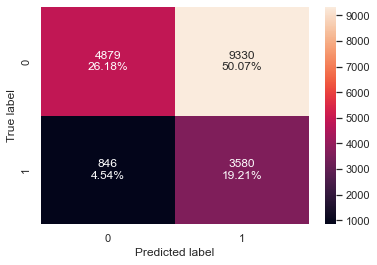

<IPython.core.display.Javascript object>

In [531]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb_over, X_test, y_test)

- The Extreme Gradient Boosting model trained on oversampled data has given **~98.6% recall** on the test set
- This performance is in line with what we achieved with this model on the **train (99.9%)** and **validation (98.7%)** sets
- So, this is a generalized model

## Feature Importance

In [532]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        tuned_xgb_over.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
last_week_pay          0.051
loan_term_5 years      0.049
loan_grade_C           0.044
loan_subgrade_C1       0.041
loan_grade_B           0.036
...                      ...
state_code_ME          0.000
state_code_MS          0.000
state_code_ND          0.000
state_code_NE          0.000
application_type_JOINT 0.000

[114 rows x 1 columns]


<IPython.core.display.Javascript object>

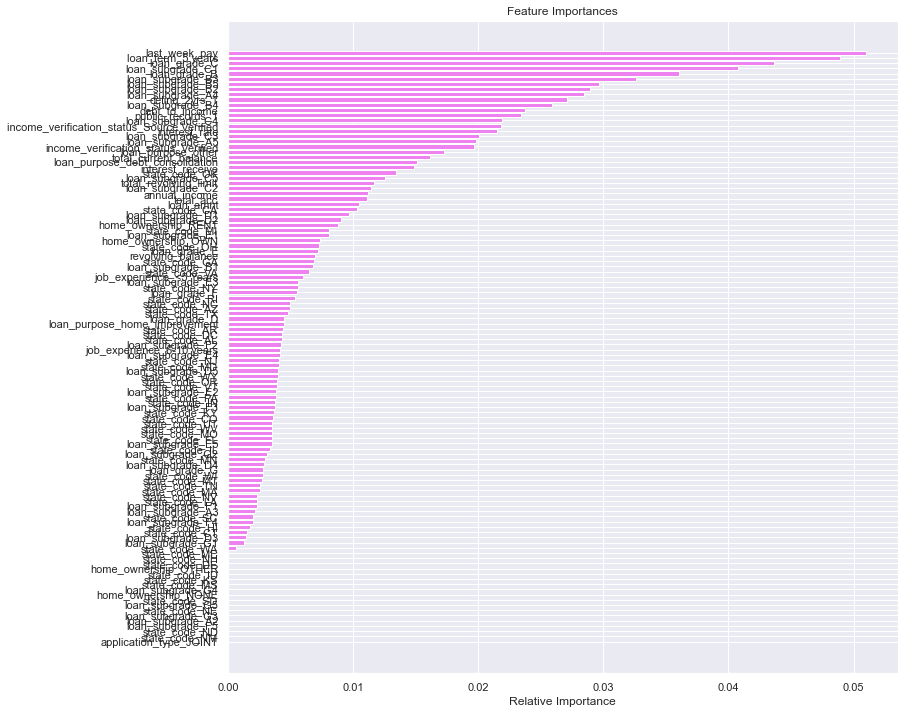

<IPython.core.display.Javascript object>

In [533]:
feature_names = X_train.columns
importances = tuned_xgb_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that last week pay, loan grade and debt to income ration are the most important features for making predictions on whether a loan customer for an NFCB will default or not.
- Other important features include loan term duration,income verification status and the applied interest rate.

# Conclusion and Insights

- 3 Year loan terms are easier to default on than 5 Year loan terms most probably due to the increased amount of repayment. The NFCBs are advised to focus on selling more longer term loans.
- Customers whose source of income is verified are more likely to pay their loans as compared to those who did not disclose their source of income. The unkowns present a risk of defaulting to the NFCB.
- The lower loan grades of A and B are more likely to defualt as compared to the other higher loan grades of E and F.
- Joint loan applications are usually not defaulted. Individual loan applications have a higher rate of default.
- Most defaulters applied for a lower loan amount.

# Model Deployment

In [546]:
# loading the dataset
test = pd.read_csv("Test_set.csv")

<IPython.core.display.Javascript object>

## Missing Value Treatment in the Test Data Set

In [547]:
# Populate  values for job experience and lastweek pay in the same way as in training data
test["job_experience"] = test["job_experience"].fillna("<5 Years")
test["last_week_pay"] = test["last_week_pay"].fillna(0.0)

# Perfoam imputation for the nan rows of total revolving limit, total current balance and total acc
imp_mode = SimpleImputer(missing_values=np.nan, strategy="median")
cols_to_impute = ["total_revolving_limit", "total_current_balance", "total_acc"]
# Fit and transform the imputer on test data
test[cols_to_impute] = imp_mode.fit_transform(test[cols_to_impute])

# Treat outliers in the test data set
test = treat_outliers_all(test, numeric_columns)

# Conver delinq_2yrs and public records into categorical variables
test["delinq_2yrs"] = test["delinq_2yrs"].map(lambda x: 0 if x == 0 else 1)
test["delinq_2yrs"] = test["delinq_2yrs"].astype("category")

test["public_records"] = test["public_records"].map(lambda x: 0 if x == 0 else 1)
test["public_records"] = test["public_records"].astype("category")

test[cat_cols] = test[cat_cols].astype("category")

# Drop the ID variable as it is not meaningful in the test dataset
test = test.drop(["ID"], axis=1)

# OHE the categorical variables
test = pd.get_dummies(data=test, drop_first=True)

# Perfoam data scaling and normalization for the numerical variables
test_normalized = scaler.fit_transform(test)

<IPython.core.display.Javascript object>

In [548]:
prediction = tuned_xgb_over.predict(test_normalized)

<IPython.core.display.Javascript object>

In [549]:
df_ss = pd.read_csv("Sample_Submission.csv")
solution_df = pd.DataFrame(df_ss)
y_test = solution_df["default"]
solution_df["default"] = prediction

<IPython.core.display.Javascript object>

In [550]:
## Setting the directory to export the file as a '.csv'
import os

os.chdir(
    r"C:\Users\Kennedy.Odunga\OneDrive - American Tower\Desktop\Desktop Nov 20th\AIML\Hackathon_2"
)

<IPython.core.display.Javascript object>

In [551]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index
solution_df.to_csv("Submission27.csv", index=False)

<IPython.core.display.Javascript object>